##### 

<a id='crisp-dm_framework'></a>
###  0. CRISP-DM Framework
***
*"CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining, is an industry-proven way to guide your data mining efforts.*

*As a methodology , it includes descriptions of the typical phases of a project, the tasks involved with each phase, and an explanation of the relationships between these tasks.*

*As a process model , CRISP-DM provides an overview of the data mining life cycle."* (2021, IBM CRISP-DM Overview)

In [1]:
import warnings
from IPython.display import display, HTML  # Update the import statement to resolve the deprecation warning

# Suppress deprecation warnings only for this block
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    display(HTML('<center><img src="https://www.ibm.com/docs/en/SS3RA7_18.1.0/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" width=600 height=300 /></center>'))    

### Business/ Research Understanding Phase

* **Define project requirements and objectives**
    * 
    

* **Translate objectives into data exploration problem definition**
    * High Level Primary objectives (not exhaustive)
        *        
        
* **Prepare preliminary strategy to meet objectives**
    * Data Required: 
    * Tools: Python via Jupyter for data preprocessing, analysis, visualisation, machine learning. Some MS Excel might be used if required


### Data Understanding Phase
* **Collect data**
    * 
    * 
* **Perform exploratory data analysis (EDA)**

* **Assess data quality**
    * Check data for duplicate records, missing valyes and inconsistent data types.
* **Optionally, select interesting subsets**
    * Identify if there’s any particular areas or anomlies which require further investigation

### Data Preparation Phase
* **Prepares for modelling in subsequent phases**
    * 
* **Select cases and variables appropriate for analysis**
    * Choose relevant columns and data subsets to include
* **Cleanse and prepare data so it is ready for modeling tools**
    * How to handle missing values
    * How to deal with data formats and standardisation

* **Perform transformation of certain variables, if needed**
    * Create new columns and variables if required

### Modelling Phase
* **Select and apply one or more modelling techniques**
* Calibrate model settings to optimize results
* Adjust hyperparameters and validate the model using cross-validation.

### Evaluation Phase
* **Evaluate one or more models for effectiveness**
    * Assess the model using appropriate metrics
    
* **Determine whether defined objectives achieved**
    * Validate whether the model(s) answer the research questions effectively
* **Make decision regarding data exploration results before deploying to field**
    * Analyse whether model(s) could be deployed in practice for this particular use case / problem statement

### Deployment Phase
* **Make use of models created**
* **Simple deployment example: generate report**
* **Complex deployment example: implement parallel data exploration effort in another department**
* **In businesses, customer often carries out deployment based on your model**
***

In [17]:
# Import EDA & visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Import statistics libraries from SciPy
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr

# Import machine learning libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Display all columns of the pandas df
pd.set_option('display.max_columns', None)

# Configure default colour scheme for seaborn
sns.set(color_codes = True)

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

### World Bank Data - GDP & Population

In [173]:
# Define csv url paths stored on GitHub
worldbank_gdp_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s1_ca2/datasets/WorldBank/world_bank_gdp_NY.GDP.MKTP.CD_20231026.csv'
worldbank_pop_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s1_ca2/datasets/WorldBank/world_bank_population_totals_SP.POP.TOTL_20231026.csv'

# Create Pandas dataframes
worldbank_gdp = pd.read_csv(worldbank_gdp_url)
worldbank_pop = pd.read_csv(worldbank_pop_url)

In [174]:
# Validate successful data load and df creation
worldbank_pop.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965         1966         1967         1968         1969  \
0      58782.0      59291.0      59522.0      59471.0      59330.0   
1  149742351.0  153955516.0  158313235.0  162875171.0  167596160.0   
2    9565147.0    9783147.0   10010030.0   10247780.0   10494489.0   
3  108336203.0  110798486.0  113319950.0  115921723.0  118615741.0   
4    5736582.0    5787044.0    5827503.0    5868203.0    5928386.0   

          1970         1971         1972         1973         1974  \
0      59106.0      58816.0      58855.0      59365.0      60028.0   
1  172475766.0  177503186.0  182599092.0  187901657.0  193512956.0   
2   10752971.0   11015857.0   11286753.0   11575305.0   11869879.0   
3  121424797.0  124336039.0  127364044.0  130563107.0  133953892.0   
4    6029700.0    6177049.0    6364731.0    6578230.0    6802494.0   

          1975         1976         1977         1978         1979  \
0      60715.0      61193.0      61465.0      61738.0      62006.0   
1  199284304.0  205202669.0  211120911.0  217481420.0  224315978.0   
2   12157386.0   12425267.0   12687301.0   12938862.0   12986369.0   
3  137548613.0  141258400.0  145122851.0  149206663.0  153459665.0   
4    7032713.0    7266780.0    7511895.0    7771590.0    8043218.0   

          1980         1981         1982         1983         1984  \
0      62267.0      62614.0      63116.0      63683.0      64174.0   
1  230967858.0  237937461.0  245386717.0  252779730.0  260209149.0   
2   12486631.0   11155195.0   10088289.0    9951449.0   10243686.0   
3  157825609.0  162323313.0  167023385.0  171566640.0  176054495.0   
4    8330047.0    8631457.0    8947152.0    9276707.0    9617702.0   

          1985         1986         1987         1988         1989  \
0      64478.0      64553.0      64450.0      64332.0      64596.0   
1  267938123.0  276035920.0  284490394.0  292795186.0  301124880.0   
2   10512221.0   10448442.0   10322758.0   10383460.0   10673168.0   
3  180817312.0  185720244.0  190759952.0  195969722.0  201392200.0   
4    9970621.0   10332574.0   10694057.0   11060261.0   11439498.0   

          1990         1991         1992         1993         1994  \
0      65712.0      67864.0      70192.0      72360.0      74710.0   
1  309890664.0  318544083.0  326933522.0  335625136.0  344418362.0   
2   10694796.0   10745167.0   12057433.0   14003760.0   15455555.0   
3  206739024.0  212172888.0  217966101.0  223788766.0  229675775.0   
4   11828638.0   12228691.0   12632507.0   13038270.0   13462031.0   

          1995         1996         1997         1998         1999  \
0      77050.0      79417.0      81858.0      84355.0      86867.0   
1  353466601.0  362985802.0  372352230.0  381715600.0  391486231.0   
2   16418912.0   17106595.0   17788819.0   18493132.0   19262847.0   
3  235861484.0  242200260.0  248713095.0  255482918.0  262397030.0   
4   13912253.0   14383350.0   14871146.0   15366864.0   15870753.0   

          2000         2001         2002         2003         2004  \
0      89101.0      90691.0      91781.0      92701.0      93540.0   
1  401600588.0  4120018

In [175]:
# Review df info
worldbank_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [176]:
# Total number of rows and columns
print('worldbank_pop:')
print(worldbank_pop.shape)
print()

# Rows containing duplicate data
worldbank_pop_dup_rows = worldbank_pop[worldbank_pop.duplicated()]
print('Number of duplicate rows:')
print(worldbank_pop.shape)
print()

# Used to count the number of rows before removing the data
print('Row count before removing duplicates:')
print()
print(worldbank_pop.count())
print()

# Dropping the duplicates
worldbank_pop = worldbank_pop.drop_duplicates()

# Counting the number of rows after removing duplicates.
print('Row count after removing duplicates:')
print()
print(worldbank_pop.count())
print()

worldbank_pop:
(266, 67)

Number of duplicate rows:
(266, 67)

Row count before removing duplicates:

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              264
                 ... 
2018              265
2019              265
2020              265
2021              265
2022              265
Length: 67, dtype: int64

Row count after removing duplicates:

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              264
                 ... 
2018              265
2019              265
2020              265
2021              265
2022              265
Length: 67, dtype: int64



In [177]:
# Filtering the DataFrame to only include rows with at least one null value
worldbank_pop_nulls = worldbank_pop[worldbank_pop.isnull().any(axis=1)]

worldbank_pop_nulls

Country Name Country Code     Indicator Name Indicator Code  1960  \
110      Not classified          INX  Population, total    SP.POP.TOTL   NaN   
196  West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   NaN   

     1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
110   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
196   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
110   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
196   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1985  1986  1987  1988  1989       1990       1991       1992       1993  \
110   NaN   NaN   NaN   NaN   NaN        NaN        NaN        NaN        NaN   
196   NaN   NaN   NaN   NaN   NaN  1978248.0  2068845.0  2163591.0  2262676.0   

          1994       1995       1996       1997       1998       1999  \
110        NaN        NaN        NaN        NaN        NaN        NaN   
196  2366298.0  2474666.0  2587997.0  2706518.0  2776568.0  2848431.0   

          2000       2001       2002       2003       2004       2005  \
110        NaN        NaN        NaN        NaN        NaN        NaN   
196  2922153.0  2997784.0  3075373.0  3154969.0  3236626.0  3320396.0   

          2006       2007       2008       2009       2010       2011  \
110        NaN        NaN        NaN        NaN        NaN        NaN   
196  3406334.0  3494496.0  3591977.0  3689099.0  3786161.0  3882986.0   

          2012       2013       2014       2015       2016       2017  \
110        NaN        NaN        NaN        NaN        NaN        NaN   
196  3979998.0  4076708.0  4173398.0  4270092.0  4367088.0  4454805.0   

          2018       2019       2020       2021       2022  
110        NaN        NaN        NaN        NaN        NaN  
196  4569087.0  4685306.0  4803269.0  4922749.0  5043612.0

In [178]:
# Dropping rows with any null values from the DataFrame
worldbank_pop = worldbank_pop.dropna()

In [179]:
# Keeping only the required columns: 'Country Name', 'Country Code', and '2022'
required_columns = ['Country Name', 'Country Code', '2022']

# Drop unwanted columns
worldbank_pop_dropped_cols = worldbank_pop[required_columns]

# Applying the filter condition
worldbank_pop_filtered = worldbank_pop_dropped_cols[(worldbank_pop_dropped_cols['2022'] >= 4500000) & (worldbank_pop_dropped_cols['2022'] <= 6000000)]

# Sorting the dataset by '2022' column in descending order
worldbank_pop_sorted = worldbank_pop_filtered.sort_values(by='2022', ascending=False)

worldbank_pop_sorted.head(20)

Country Name Country Code       2022
44                Congo, Rep.          COG  5970424.0
58                    Denmark          DNK  5903037.0
208                 Singapore          SGP  5637022.0
34   Central African Republic          CAF  5579144.0
75                    Finland          FIN  5556880.0
130                   Lebanon          LBN  5489739.0
177                    Norway          NOR  5457127.0
221           Slovak Republic          SVK  5431752.0
131                   Liberia          LBR  5302681.0
48                 Costa Rica          CRI  5180829.0
180               New Zealand          NZL  5124100.0
111                   Ireland          IRL  5086988.0
166                Mauritania          MRT  4736139.0
182                      Oman          OMN  4576298.0

In [180]:
# Creating a new column 'Population (Mn.)'
worldbank_pop_sorted['Population (Mn.)'] = (worldbank_pop_sorted['2022'] / 1000000).round(2)

worldbank_pop_sorted

Country Name Country Code       2022  Population (Mn.)
44                Congo, Rep.          COG  5970424.0              5.97
58                    Denmark          DNK  5903037.0              5.90
208                 Singapore          SGP  5637022.0              5.64
34   Central African Republic          CAF  5579144.0              5.58
75                    Finland          FIN  5556880.0              5.56
130                   Lebanon          LBN  5489739.0              5.49
177                    Norway          NOR  5457127.0              5.46
221           Slovak Republic          SVK  5431752.0              5.43
131                   Liberia          LBR  5302681.0              5.30
48                 Costa Rica          CRI  5180829.0              5.18
180               New Zealand          NZL  5124100.0              5.12
111                   Ireland          IRL  5086988.0              5.09
166                Mauritania          MRT  4736139.0              4.74
182                      Oman          OMN  4576298.0              4.58

In [181]:
# Generate descriptive statistics 
worldbank_pop_sorted.describe()

2022  Population (Mn.)
count  1.400000e+01         14.000000
mean   5.359440e+06          5.360000
std    3.953000e+05          0.394345
min    4.576298e+06          4.580000
25%    5.138282e+06          5.135000
50%    5.444440e+06          5.445000
75%    5.573578e+06          5.575000
max    5.970424e+06          5.970000

In [182]:
# Reset float display option
pd.reset_option('display.float_format')

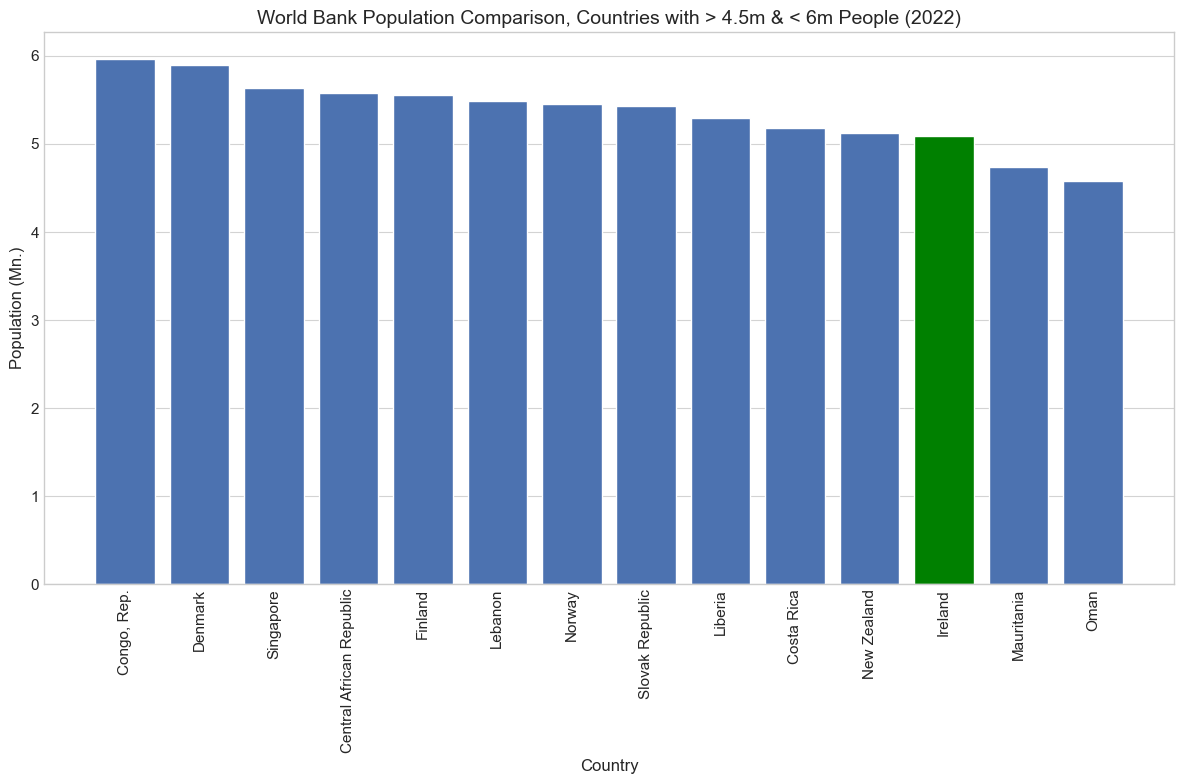

In [183]:
import matplotlib.pyplot as plt

# Set colors: 'green' for Ireland, 'blue' for other countries
colors = ['green' if country == 'Ireland' else 'b' for country in worldbank_pop_sorted['Country Name']]

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(worldbank_pop_sorted['Country Name'], worldbank_pop_sorted['Population (Mn.)'], color=colors)
plt.xlabel('Country', size = 12)
plt.ylabel('Population (Mn.)', size = 12)
plt.xticks(rotation = 90)  # Rotate the x-axis labels for better readability
plt.title('World Bank Population Comparison, Countries with > 4.5m & < 6m People (2022)', size = 14)
plt.gca().yaxis.grid(True, color = 'lightgrey', linestyle = '-', linewidth = 0.8)
plt.gca().xaxis.grid(False)
plt.tight_layout()
plt.show()

In [184]:
# Validate successful data load and df creation
worldbank_gdp.head()

Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  2.112502e+10  2.161623e+10  2.350628e+10  2.804836e+10   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.044764e+10  1.117321e+10  1.199053e+10  1.272769e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965          1966          1967          1968  \
0           NaN           NaN           NaN           NaN           NaN   
1  2.592067e+10  2.947210e+10  3.201437e+10  3.326951e+10  3.632779e+10   
2  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09   
3  1.389811e+10  1.492979e+10  1.591084e+10  1.451058e+10  1.496824e+10   
4           NaN           NaN           NaN           NaN           NaN   

           1969          1970          1971          1972          1973  \
0           NaN           NaN           NaN           NaN           NaN   
1  4.163897e+10  4.462989e+10  4.917337e+10  5.312346e+10  6.948272e+10   
2  1.408889e+09  1.748887e+09  1.831109e+09  1.595555e+09  1.733333e+09   
3  1.697932e+10  2.359616e+10  2.093636e+10  2.538617e+10  3.197559e+10   
4           NaN           NaN           NaN           NaN           NaN   

           1974          1975          1976          1977          1978  \
0           NaN           NaN           NaN           NaN           NaN   
1  8.538065e+10  9.083543e+10  9.021275e+10  1.022410e+11  1.160850e+11   
2  2.155555e+09  2.366667e+09  2.555556e+09  2.953333e+09  3.300000e+09   
3  4.441668e+10  5.166719e+10  6.235162e+10  6.559512e+10  7.149650e+10   
4           NaN           NaN           NaN           NaN           NaN   

           1979          1980          1981          1982          1983  \
0           NaN           NaN           NaN           NaN           NaN   
1  1.342570e+11  1.712180e+11  1.758590e+11  1.680960e+11  1.755650e+11   
2  3.697940e+09  3.641723e+09  3.478788e+09           NaN           NaN   
3  8.894834e+10  1.124390e+11  2.113380e+11  1.874490e+11  1.383840e+11   
4           NaN  5.930503e+09  5.550483e+09  5.550483e+09  5.784342e+09   

           1984          1985          1986          1987          1988  \
0           NaN           NaN  4.055866e+08  4.877095e+08  5.966480e+08   
1  1.606470e+11  1.367590e+11  1.530500e+11  1.866580e+11  2.047660e+11   
2           NaN           NaN           NaN           NaN           NaN   
3  1.145160e+11  1.167770e+11  1.078870e+11  1.107290e+11  1.094390e+11   
4  6.131475e+09  7.554065e+09  7.072536e+09  8.084412e+09  8.769837e+09   

           1989          1990          1991          1992          1993  \
0  6.955307e+08  7.648045e+08  8.720670e+08  9.586592e+08  1.083240e+09   
1  2.182420e+11  2.540620e+11  2.768570e+11  2.460880e+11  2.429260e+11   
2           NaN           NaN           NaN           NaN           NaN   
3  1.022550e+11  1.223870e+11  1.180400e+11  1.188930e+11  9.927218e+10   
4  1.020178e+10  1.122952e+10  1.270456e+10  1.511435e+10  1.105194e+10   

           1994          1995          1996          1997          1998  \
0  1.245810e+09  1.320670e+09  1.379888e+09  1.531844e+09  1.665363e+09   
1  2.396110e+11  2.703270e+11  2.694910e+11  2.834460e+11  2.666520e+11   
2           NaN           NaN           NaN           NaN           NaN   
3  8.663640e+10  1.086910e+11  1.262870e+11  1.276020e+11  1.306780e+11   
4  3.390500e+09  5.561222e+09  7.526964e+09  7.648377e+09  6.506230e+09   

 

In [185]:
# Review df info
worldbank_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            134 non-null    float64
 6   1962            136 non-null    float64
 7   1963            136 non-null    float64
 8   1964            136 non-null    float64
 9   1965            147 non-null    float64
 10  1966            150 non-null    float64
 11  1967            153 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            167 non-null    float64
 15  1971            170 non-null    float64
 16  1972            170 non-null    float64
 17  1973            170 non-null    flo

In [186]:
# Total number of rows and columns
print('worldbank_gdp:')
print(worldbank_gdp.shape)
print()

# Rows containing duplicate data
worldbank_gdp_dup_rows = worldbank_gdp[worldbank_gdp.duplicated()]
print('Number of duplicate rows:')
print(worldbank_gdp.shape)
print()

# Used to count the number of rows before removing the data
print('Row count before removing duplicates:')
print()
print(worldbank_gdp.count())
print()

# Dropping the duplicates
worldbank_gdp = worldbank_gdp.drop_duplicates()

# Counting the number of rows after removing duplicates.
print('Row count after removing duplicates:')
print()
print(worldbank_gdp.count())
print()

worldbank_gdp:
(266, 67)

Number of duplicate rows:
(266, 67)

Row count before removing duplicates:

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              132
                 ... 
2018              258
2019              257
2020              257
2021              251
2022              233
Length: 67, dtype: int64

Row count after removing duplicates:

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              132
                 ... 
2018              258
2019              257
2020              257
2021              251
2022              233
Length: 67, dtype: int64



In [187]:
# Filtering the dataframe for 'Norway', 'Finland', and 'Denmark'
worldbank_gdp = worldbank_gdp[worldbank_gdp['Country Name'].isin(['Norway', 'Finland', 'Denmark', 'Ireland'])]

worldbank_gdp.head()

Country Name Country Code     Indicator Name  Indicator Code  \
58       Denmark          DNK  GDP (current US$)  NY.GDP.MKTP.CD   
75       Finland          FIN  GDP (current US$)  NY.GDP.MKTP.CD   
111      Ireland          IRL  GDP (current US$)  NY.GDP.MKTP.CD   
177       Norway          NOR  GDP (current US$)  NY.GDP.MKTP.CD   

             1960          1961          1962          1963          1964  \
58            NaN           NaN           NaN           NaN           NaN   
75   5.224102e+09  5.921659e+09  6.340581e+09  6.885920e+09  7.766655e+09   
111  1.939330e+09  2.088012e+09  2.260350e+09  2.430844e+09  2.766609e+09   
177  5.163272e+09  5.632461e+09  6.066977e+09  6.510240e+09  7.159203e+09   

             1965          1966          1967          1968          1969  \
58            NaN  1.193174e+10  1.305907e+10  1.350557e+10  1.541490e+10   
75   8.589340e+09  9.208525e+09  9.368954e+09  8.823034e+09  1.007077e+10   
111  2.945704e+09  3.104034e+09  3.343637e+09  3.278584e+09  3.787077e+09   
177  8.058681e+09  8.696460e+09  9.514497e+09  1.015993e+10  1.106306e+10   

             1970          1971          1972          1973          1974  \
58   1.707546e+10  1.908563e+10  2.323241e+10  3.073063e+10  3.416044e+10   
75   1.135752e+10  1.252741e+10  1.474319e+10  1.947236e+10  2.484882e+10   
111  4.395995e+09  5.098250e+09  6.318061e+09  7.481173e+09  7.896861e+09   
177  1.281419e+10  1.458310e+10  1.735848e+10  2.253412e+10  2.714565e+10   

             1975          1976          1977          1978          1979  \
58   4.047441e+10  4.457571e+10  4.978441e+10  6.036266e+10  7.036680e+10   
75   2.947262e+10  3.184951e+10  3.349980e+10  3.625616e+10  4.446526e+10   
111  9.483808e+09  9.453756e+09  1.124834e+10  1.464800e+10  1.831933e+10   
177  3.287754e+10  3.594216e+10  4.150803e+10  4.652290e+10  5.313259e+10   

             1980          1981          1982          1983          1984  \
58   7.112700e+10  6.187810e+10  6.041254e+10  6.064484e+10  5.910528e+10   
75   5.364520e+10  5.244833e+10  5.279758e+10  5.097353e+10  5.288880e+10   
111  2.174786e+10  2.067019e+10  2.147475e+10  2.076605e+10  2.010665e+10   
177  6.443906e+10  6.359656e+10  6.264687e+10  6.162752e+10  6.205827e+10   

             1985          1986          1987          1988          1989  \
58   6.265862e+10  8.807885e+10  1.094140e+11  1.155520e+11  1.124100e+11   
75   5.587586e+10  7.353155e+10  9.159475e+10  1.090590e+11  1.190120e+11   
111  2.127001e+10  2.871457e+10  3.392052e+10  3.777290e+10  3.923839e+10   
177  6.541663e+10  7.869267e+10  9.423061e+10  1.019010e+11  1.026340e+11   

             1990          1991          1992          1993          1994  \
58   1.382480e+11  1.392260e+11  1.529150e+11  1.431950e+11  1.561640e+11   
75   1.414380e+11  1.277740e+11  1.125330e+11  8.921411e+10  1.033000e+11   
111  4.930563e+10  4.978750e+10  5.591854e+10  5.241748e+10  5.709766e+10   
177  1.197910e+11  1.218720e+11  1.308380e+11  1.205790e+11  1.271320e+11   

             1995          1996          1997          1998          1999  \
58   1.850080e+11  1.876330e+11  1.735390e+11  1.769910e+11  1.779640e+11   
75   1.341900e+11  1.321290e+11  1.269120e+11  1.340390e+11  1.352640e+11   
111  6.913982e+10  7.579079e+10  8.285665e+10  9.019941e+10  9.889396e+10   
177  1.520310e+11  1.635200e+11  1.613570e+11  1.542300e+11  1.623840e+11   

             2000          2001          2002          2003          2004  \
58   1.641580e+11  1.647910e+11  1.786350e+11  2.180970e+11  2.513750e+11   
75   1.260200e+11  1.295330e+11  1.404040e+11  1.716520e+11  1.974790e+11   
111  1.002080e+11  1.093470e+11  1.285960e+11  1.646710e+11  1.943720e+11   
177  1.714560e+11  1.742400e+11  1.959150e+11  2.293850e+11  2.652670e+11   

             2005          2006          2007          2008          2009  \
58   2.644670e+11  2.828860e+11  3.194230e+11  3.533590e+11  3.212430e+11   
75   2.048850e+11  2.170890e+11  2.

In [188]:
# Keeping only the required columns: 'Country Name', 'Country Code', and '2022'
required_columns = ['Country Name', 'Country Code', '2022']

# Drop unwanted columns
worldbank_gdp_dropped_cols = worldbank_gdp[required_columns]

# Sorting the dataset by '2022' column in descending order
worldbank_gdp_sorted = worldbank_gdp_dropped_cols.sort_values(by='2022', ascending=False)

worldbank_gdp_sorted.head()

Country Name Country Code          2022
177       Norway          NOR  5.792670e+11
111      Ireland          IRL  5.292450e+11
58       Denmark          DNK  3.954040e+11
75       Finland          FIN  2.808260e+11

In [189]:
# Creating a new column 'Population (Mn.)'
worldbank_gdp_sorted['GDP (Bn.)'] = (worldbank_gdp_sorted['2022'] / 1000000000).round(2)

worldbank_gdp_sorted

Country Name Country Code          2022  GDP (Bn.)
177       Norway          NOR  5.792670e+11     579.27
111      Ireland          IRL  5.292450e+11     529.24
58       Denmark          DNK  3.954040e+11     395.40
75       Finland          FIN  2.808260e+11     280.83

In [190]:
# Generate descriptive statistics 
worldbank_gdp_sorted.describe()

2022   GDP (Bn.)
count  4.000000e+00    4.000000
mean   4.461855e+11  446.185000
std    1.348235e+11  134.822281
min    2.808260e+11  280.830000
25%    3.667595e+11  366.757500
50%    4.623245e+11  462.320000
75%    5.417505e+11  541.747500
max    5.792670e+11  579.270000

In [191]:
# Reset float display option
pd.reset_option('display.float_format')

In [194]:
worldbank_gdp_sorted.head()

Country Name Country Code          2022  GDP (Bn.)
177       Norway          NOR  5.792670e+11     579.27
111      Ireland          IRL  5.292450e+11     529.24
58       Denmark          DNK  3.954040e+11     395.40
75       Finland          FIN  2.808260e+11     280.83

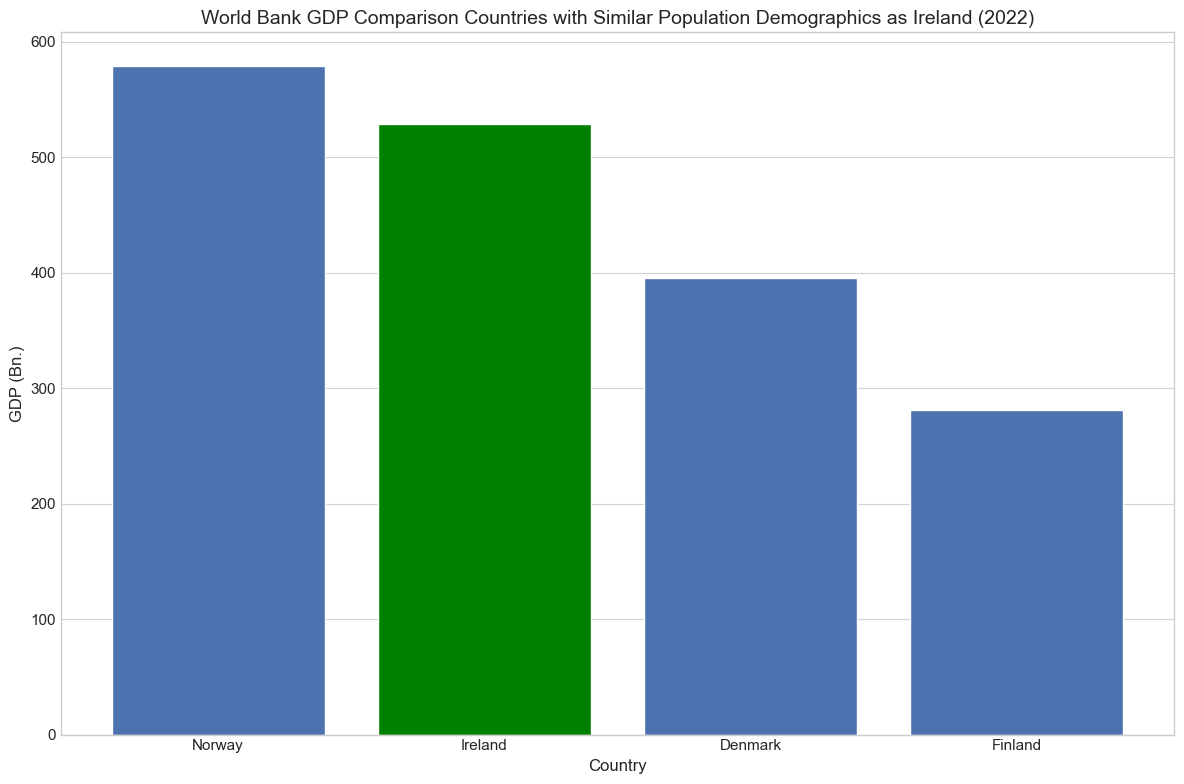

In [200]:
import matplotlib.pyplot as plt

# Set colors: 'green' for Ireland, 'blue' for other countries
colors = ['green' if country == 'Ireland' else 'b' for country in worldbank_gdp_sorted['Country Name']]

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(worldbank_gdp_sorted['Country Name'], worldbank_gdp_sorted['GDP (Bn.)'], color=colors)
plt.xlabel('Country', size = 12)
plt.ylabel('GDP (Bn.)', size = 12)
plt.title('World Bank GDP Comparison Countries with Similar Population Demographics as Ireland (2022)', size = 14)
plt.gca().yaxis.grid(True, color = 'lightgrey', linestyle = '-', linewidth = 0.8)
plt.gca().xaxis.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import googlemaps

APIKey = "***"

gmaps = googlemaps.Client(key = APIKey)

In [ ]:
# Empty list to store the results
lat_lng = []

# Loop through each town and perform a geocode search
for town in unique_towns:
    geocode_result = gmaps.geocode(town)
    if geocode_result:
        location = geocode_result[0]['geometry']['location']
        lat_lng.append({'Town': town, 'Latitude': location['lat'], 'Longitude': location['lng']})
    else:
        lat_lng.append({'Town': town, 'Latitude': None, 'Longitude': None})

# Convert the results to a DataFrame
df_lat_lng = pd.DataFrame(lat_lng)

# Display the DataFrame
print(df_lat_lng)

In [273]:
# Import EDA & visualisation libraries
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [274]:
# Import EDA & visualisation libraries
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [284]:
data = pd.read_csv(r'C:\Users\shass\my_github\cct_msc_data_analytics\s1_ca2\datasets\CSO\cso_usually_resident_by_means_of_travel_to_work_school_college_or_childcare_2022.csv')
data.head()

STATISTIC                              Statistic Label  TLIST(A1)  \
0  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
1  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
2  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
3  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
4  SAP2022T11T1C01  Usually resident by means of travel to work       2022   

   Census Year                          C04160V04929  \
0         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
1         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
2         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
3         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
4         2022  19dd11de-4bb3-4093-89cb-6133c31006af   

                  Towns 2022 C03767V04516        Means of Travel    UNIT  \
0  Carlingford,Louth,Ireland            F                On Foot  Number   
1  Carlingford,Louth,Ireland           BI                Bicycle  Number   
2  Carlingford,Louth,Ireland           BU  Bus, minibus or coach  Number   
3  Carlingford,Louth,Ireland          TDL    Train, DART or LUAS  Number   
4  Carlingford,Louth,Ireland            M  Motorcycle or scooter  Number   

   VALUE  
0     55  
1      9  
2     11  
3      4  
4      1

In [285]:
df_lat_lng = pd.read_csv('df_lat_lng.csv')
df_lat_lng.head()

Unnamed: 0                        Town   Latitude  Longitude
0           0   Carlingford,Louth,Ireland  54.046868  -6.190181
1           1   Clogherhead,Louth,Ireland  53.791678  -6.238851
2           2       Baltray,Louth,Ireland  53.737111  -6.270490
3           3  Termonfeckin,Louth,Ireland  53.761014  -6.271843
4           4       Rampark,Louth,Ireland  53.975150  -6.486170

In [286]:
unique_towns = data['Towns 2022'].unique()
unique_towns

array(['Carlingford,Louth,Ireland', 'Clogherhead,Louth,Ireland',
       'Baltray,Louth,Ireland', 'Termonfeckin,Louth,Ireland',
       'Rampark,Louth,Ireland', 'Omeath,Louth,Ireland',
       'Jenkinstown,Louth,Ireland', 'Beaulieu,Louth,Ireland',
       'Drogheda,Louth,Ireland', 'Annagassan,Louth,Ireland',
       'Castlebellingham-Kilsaran,Louth,Ireland', 'Dunleer,Louth,Ireland',
       'Dundalk,Louth,Ireland', 'Dromiskin,Louth,Ireland',
       'Tullyallen,Louth,Ireland', 'Tinure,Louth,Ireland',
       'Collon,Louth,Ireland', 'Knockbridge,Louth,Ireland',
       'Ardee,Louth,Ireland', 'Louth,Louth,Ireland',
       'Tallanstown,Louth,Ireland', 'Gormanston,Meath,Ireland',
       'Laytown-Bettystown-Mornington-Donacarney,Meath,Ireland',
       'Stamullen,Meath,Ireland', 'Julianstown,Meath,Ireland',
       'Ashbourne,Meath,Ireland', 'Duleek,Meath,Ireland',
       'Donore,Meath,Ireland', 'Clonee,Meath,Ireland',
       'Ratoath,Meath,Ireland', 'Dunboyne,Meath,Ireland',
       'Kentstown,Meath,I

In [287]:
# Merge datasets
data = pd.merge(data, df_lat_lng, how = 'outer', left_on = 'Towns 2022', right_on = 'Town')

data.head()

STATISTIC                              Statistic Label  TLIST(A1)  \
0  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
1  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
2  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
3  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
4  SAP2022T11T1C01  Usually resident by means of travel to work       2022   

   Census Year                          C04160V04929  \
0         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
1         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
2         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
3         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
4         2022  19dd11de-4bb3-4093-89cb-6133c31006af   

                  Towns 2022 C03767V04516        Means of Travel    UNIT  \
0  Carlingford,Louth,Ireland            F                On Foot  Number   
1  Carlingford,Louth,Ireland           BI                Bicycle  Number   
2  Carlingford,Louth,Ireland           BU  Bus, minibus or coach  Number   
3  Carlingford,Louth,Ireland          TDL    Train, DART or LUAS  Number   
4  Carlingford,Louth,Ireland            M  Motorcycle or scooter  Number   

   VALUE  Unnamed: 0                       Town   Latitude  Longitude  
0     55           0  Carlingford,Louth,Ireland  54.046868  -6.190181  
1      9           0  Carlingford,Louth,Ireland  54.046868  -6.190181  
2     11           0  Carlingford,Louth,Ireland  54.046868  -6.190181  
3      4           0  Carlingford,Louth,Ireland  54.046868  -6.190181  
4      1           0  Carlingford,Louth,Ireland  54.046868  -6.190181

In [288]:
# Split 'Towns 2022' column into 'Town' & 'County'
data[['Town', 'County','Country']] = data['Town'].str.split(',', expand = True)
data.head()

STATISTIC                              Statistic Label  TLIST(A1)  \
0  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
1  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
2  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
3  SAP2022T11T1C01  Usually resident by means of travel to work       2022   
4  SAP2022T11T1C01  Usually resident by means of travel to work       2022   

   Census Year                          C04160V04929  \
0         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
1         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
2         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
3         2022  19dd11de-4bb3-4093-89cb-6133c31006af   
4         2022  19dd11de-4bb3-4093-89cb-6133c31006af   

                  Towns 2022 C03767V04516        Means of Travel    UNIT  \
0  Carlingford,Louth,Ireland            F                On Foot  Number   
1  Carlingford,Louth,Ireland           BI                Bicycle  Number   
2  Carlingford,Louth,Ireland           BU  Bus, minibus or coach  Number   
3  Carlingford,Louth,Ireland          TDL    Train, DART or LUAS  Number   
4  Carlingford,Louth,Ireland            M  Motorcycle or scooter  Number   

   VALUE  Unnamed: 0         Town   Latitude  Longitude County  Country  
0     55           0  Carlingford  54.046868  -6.190181  Louth  Ireland  
1      9           0  Carlingford  54.046868  -6.190181  Louth  Ireland  
2     11           0  Carlingford  54.046868  -6.190181  Louth  Ireland  
3      4           0  Carlingford  54.046868  -6.190181  Louth  Ireland  
4      1           0  Carlingford  54.046868  -6.190181  Louth  Ireland

In [289]:
# Pivoting the data
pivoted_data = data.pivot_table(index=['Town', 'County', 'Latitude', 'Longitude'], columns='Means of Travel', values='VALUE', aggfunc='sum', fill_value=0)

# Remove the row with index 'State'
pivoted_data = pivoted_data.drop(index = 'State', errors = 'ignore')

# Display the first few rows of the pivoted dataset
pivoted_data.head()

Means of Travel                             Bicycle  Bus, minibus or coach  \
Town          County   Latitude  Longitude                                   
Abbeydorney   Kerry    52.346618 -9.687909        0                     68   
Abbeyfeale    Limerick 52.385179 -9.300797       14                     64   
Abbeyknockmoy Galway   53.436490 -8.748040        0                     76   
Abbeyleix     Laois    52.915280 -7.347892       26                    258   
Adamstown     Wexford  52.393569 -6.718557        2                     10   

Means of Travel                             Car Driver  Car passenger  \
Town          County   Latitude  Longitude                              
Abbeydorney   Kerry    52.346618 -9.687909         302            226   
Abbeyfeale    Limerick 52.385179 -9.300797        1074            550   
Abbeyknockmoy Galway   53.436490 -8.748040         226            126   
Abbeyleix     Laois    52.915280 -7.347892         918            504   
Adamstown     Wexford  52.393569 -6.718557         150            102   

Means of Travel                             Motorcycle or scooter  Not stated  \
Town          County   Latitude  Longitude                                      
Abbeydorney   Kerry    52.346618 -9.687909                      0          22   
Abbeyfeale    Limerick 52.385179 -9.300797                      2         110   
Abbeyknockmoy Galway   53.436490 -8.748040                      0          18   
Abbeyleix     Laois    52.915280 -7.347892                      4         136   
Adamstown     Wexford  52.393569 -6.718557                      0          44   

Means of Travel                             On Foot  Other (incl. lorry)  \
Town          County   Latitude  Longitude                                 
Abbeydorney   Kerry    52.346618 -9.687909       54                    2   
Abbeyfeale    Limerick 52.385179 -9.300797      462                   10   
Abbeyknockmoy Galway   53.436490 -8.748040       18                    2   
Abbeyleix     Laois    52.915280 -7.347892      278                    6   
Adamstown     Wexford  52.393569 -6.718557       76                    0   

Means of Travel                             Total  Train, DART or LUAS  Van  \
Town          County   Latitude  Longitude                                    
Abbeydorney   Kerry    52.346618 -9.687909    782                    2   76   
Abbeyfeale    Limerick 52.385179 -9.300797   2628                    2  216   
Abbeyknockmoy Galway   53.436490 -8.748040    526                    0   26   
Abbeyleix     Laois    52.915280 -7.347892   2436                   46  138   
Adamstown     Wexford  52.393569 -6.718557    410                    0   10   

Means of Travel                             Work mainly at or from home  
Town          County   Latitude  Longitude                               
Abbeydorney   Kerry    52.346618 -9.687909                           30  
Abbeyfeale    Limerick 52.385179 -9.300797                          124  
Abbeyknockmoy Galway   53.436490 -8.748040                           34  
Abbeyleix     Laois    52.915280 -7.347892                          122  
Adamstown     Wexford  52.393569 -6.718557                           16

In [290]:
# Create calculated columns to aggregate values based on their respective travel category
pivoted_data['Car'] = pivoted_data['Car passenger'] + pivoted_data['Car Driver'] + pivoted_data['Van']
pivoted_data['Bicyle / On Foot'] = pivoted_data['Bicycle'] + pivoted_data['On Foot']


# Remove unnecessary columns including 'Total' which will be recalcaulted
pivoted_data = pivoted_data.drop(columns=['Total', 'Car Driver', 'Car passenger', 'Bicycle', 'On Foot', 
                                          'Van', 'Not stated', 'Work mainly at or from home'])

# Create a new 'Total' column
pivoted_data['Total'] = pivoted_data.sum(axis = 1)

# Rename columns using dictionary
pivoted_data.rename(columns = {'Bus, minibus or coach':'Bus',
                              'Motorcycle or scooter':'Motorcycle',
                              'Other (incl. lorry)':'Other',
                               'Train, DART or LUAS':'Rail',}, inplace = True)

pivoted_data.head()

Means of Travel                             Bus  Motorcycle  Other  Rail  \
Town          County   Latitude  Longitude                                 
Abbeydorney   Kerry    52.346618 -9.687909   68           0      2     2   
Abbeyfeale    Limerick 52.385179 -9.300797   64           2     10     2   
Abbeyknockmoy Galway   53.436490 -8.748040   76           0      2     0   
Abbeyleix     Laois    52.915280 -7.347892  258           4      6    46   
Adamstown     Wexford  52.393569 -6.718557   10           0      0     0   

Means of Travel                              Car  Bicyle / On Foot  Total  
Town          County   Latitude  Longitude                                 
Abbeydorney   Kerry    52.346618 -9.687909   604                54    730  
Abbeyfeale    Limerick 52.385179 -9.300797  1840               476   2394  
Abbeyknockmoy Galway   53.436490 -8.748040   378                18    474  
Abbeyleix     Laois    52.915280 -7.347892  1560               304   2178  
Adamstown     Wexford  52.393569 -6.718557   262                78    350

The National Household Travel Survey found that 69pc of all trips are made in a private car with walking the next most popular transport mode at 20pc, followed by bus/coach at 5pc.

In [291]:
pivoted_data_t_test = pivoted_data.reset_index()

pivoted_data_t_test.head()

Means of Travel           Town    County   Latitude  Longitude  Bus  \
0                  Abbeydorney     Kerry  52.346618  -9.687909   68   
1                   Abbeyfeale  Limerick  52.385179  -9.300797   64   
2                Abbeyknockmoy    Galway  53.436490  -8.748040   76   
3                    Abbeyleix     Laois  52.915280  -7.347892  258   
4                    Adamstown   Wexford  52.393569  -6.718557   10   

Means of Travel  Motorcycle  Other  Rail   Car  Bicyle / On Foot  Total  
0                         0      2     2   604                54    730  
1                         2     10     2  1840               476   2394  
2                         0      2     0   378                18    474  
3                         4      6    46  1560               304   2178  
4                         0      0     0   262                78    350

In [292]:
# Dropping the specified columns
columns_to_drop = ['Town', 'County', 'Latitude', 'Longitude']
pivoted_data_t_test = pivoted_data_t_test.drop(columns=columns_to_drop)

pivoted_data_t_test.head()

Means of Travel  Bus  Motorcycle  Other  Rail   Car  Bicyle / On Foot  Total
0                 68           0      2     2   604                54    730
1                 64           2     10     2  1840               476   2394
2                 76           0      2     0   378                18    474
3                258           4      6    46  1560               304   2178
4                 10           0      0     0   262                78    350

In [293]:
# Calculate the sum total of all columns
column_sums = pivoted_data_t_test.sum(numeric_only = True)

column_sums

Means of Travel
Bus                  463586
Motorcycle            15974
Other                 11424
Rail                 158600
Car                 2626494
Bicyle / On Foot    1023056
Total               4299134
dtype: int64

In [294]:
# Total value for the 'Total' column
total_sum = column_sums['Total']

In [295]:
# Calculating the proportion of each summed value relative to the total sum
proportions = column_sums / total_sum
proportions

Means of Travel
Bus                 0.107832
Motorcycle          0.003716
Other               0.002657
Rail                0.036891
Car                 0.610936
Bicyle / On Foot    0.237968
Total               1.000000
dtype: float64

In [296]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Sample proportion for 'Car'
sample_proportion = 0.610936

# Comparison proportion from the National Household Travel Survey
comparison_proportion = 0.69

# Define the sample size
sample_size = 10000

# Calculate the number of 'successes' in my sample
count = int(sample_proportion * sample_size)

# Conduct z-test for proportions
stat, p_value = proportions_ztest(count, sample_size, comparison_proportion)

stat, p_value

(-16.2241071360214, 3.4063490808656885e-59)

The Z-statistic is a measure of how many standard deviations an element is from the mean. A very negative or positive Z-statistic indicates that the observed proportion is very different from the expected proportion under the null hypothesis.

The p-value is extremely small (much less than any conventional significance level like 0.05 or 0.01), suggesting that the difference between your observed proportion of car travel (61.0936%) and the National Household Travel Survey's reported proportion (69%) is statistically significant.

Therefore, we reject the null hypothesis and conclude that the proportion of trips made by private car in your data is significantly different from the 69% reported in the National Household Travel Survey.

In [298]:
from pyjstat import pyjstat

# Read from json-stat
ire_dub_bus_monthly_passengers = pyjstat.Dataset.read('https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s1_ca2/datasets/CSO/cso_dublin_bus_passengers_by_month_2014_to_2022_json.json')

# Write to pandas df
ire_dub_bus_monthly_passengers = ire_dub_bus_monthly_passengers.write('dataframe')

# Validate results
ire_dub_bus_monthly_passengers.head()

Statistic  Year       Month        value
0  Dublin Bus passenger  2014  All months  116261991.0
1  Dublin Bus passenger  2014     January    8991175.0
2  Dublin Bus passenger  2014    February    9117393.0
3  Dublin Bus passenger  2014       March   10327497.0
4  Dublin Bus passenger  2014       April    9648830.0

CSO provides data in various formats including JSON.stat. I used the pyjstat Python library to bring in this data due to it's simplicity and ability to easily parse JSON data.

JSON supports hierarchical, nested data structures and arrays which make them effective at dealing with complex data structures. For the purposes of this analysis I don't envisage having to use data with overly complex structures so CSV will generally be an adequate format due to it's simplicity and flat nature.

https://pypi.org/project/pyjstat/

In [299]:
# Print a concise summary of the df
ire_dub_bus_monthly_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Statistic  117 non-null    object 
 1   Year       117 non-null    object 
 2   Month      117 non-null    object 
 3   value      117 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.8+ KB


In [300]:
# Total number of rows and columns
print('ire_dub_bus_monthly_passengers:')
print(ire_dub_bus_monthly_passengers.shape)
print()

# Rows containing duplicate data
ire_dub_bus_monthly_passengers_dup_rows = ire_dub_bus_monthly_passengers[ire_dub_bus_monthly_passengers.duplicated()]
print('Number of duplicate rows:')
print(ire_dub_bus_monthly_passengers.shape)
print()

# Used to count the number of rows before removing the data
print('Row count before removing duplicates:')
print()
print(ire_dub_bus_monthly_passengers.count())
print()

# Dropping the duplicates
ire_dub_bus_monthly_passengers = ire_dub_bus_monthly_passengers.drop_duplicates()

# Counting the number of rows after removing duplicates.
print('Row count after removing duplicates:')
print()
print(ire_dub_bus_monthly_passengers.count())
print()

ire_dub_bus_monthly_passengers:
(117, 4)

Number of duplicate rows:
(117, 4)

Row count before removing duplicates:

Statistic    117
Year         117
Month        117
value        117
dtype: int64

Row count after removing duplicates:

Statistic    117
Year         117
Month        117
value        117
dtype: int64



In [301]:
# Create new column to convert number of passengers 'value' from raw into millions
ire_dub_bus_monthly_passengers['Passengers (Mn.)'] = (ire_dub_bus_monthly_passengers['value']/1000000).round(2)

ire_dub_bus_monthly_passengers.head()

Statistic  Year       Month        value  Passengers (Mn.)
0  Dublin Bus passenger  2014  All months  116261991.0            116.26
1  Dublin Bus passenger  2014     January    8991175.0              8.99
2  Dublin Bus passenger  2014    February    9117393.0              9.12
3  Dublin Bus passenger  2014       March   10327497.0             10.33
4  Dublin Bus passenger  2014       April    9648830.0              9.65

In [302]:
# Drop unnecessary columns
ire_dub_bus_monthly_passengers.drop(['Statistic', 'value'], axis = 1, inplace = True)

ire_dub_bus_monthly_passengers

Year       Month  Passengers (Mn.)
0    2014  All months            116.26
1    2014     January              8.99
2    2014    February              9.12
3    2014       March             10.33
4    2014       April              9.65
..    ...         ...               ...
112  2022      August             10.45
113  2022   September             11.65
114  2022     October             12.28
115  2022    November             12.22
116  2022    December             10.75

[117 rows x 3 columns]

In [303]:
# Convert datatype values
ire_dub_bus_monthly_passengers['Year'] = ire_dub_bus_monthly_passengers['Year'].astype('int')

# Validate datatypes
ire_dub_bus_monthly_passengers.dtypes

Year                  int32
Month                object
Passengers (Mn.)    float64
dtype: object

In [304]:
# Split dataset into seperate 'Monthly' & 'Yearly' dataframes
ire_dub_bus_yearly_passengers = ire_dub_bus_monthly_passengers[ire_dub_bus_monthly_passengers['Month'] == 'All months'].reset_index(drop=True)
ire_dub_bus_months_passengers = ire_dub_bus_monthly_passengers[ire_dub_bus_monthly_passengers['Month'] != 'All months'].reset_index(drop=True)

In [305]:
# Validate results
ire_dub_bus_yearly_passengers.head(10)

Year       Month  Passengers (Mn.)
0  2014  All months            116.26
1  2015  All months            122.09
2  2016  All months            125.38
3  2017  All months            138.98
4  2018  All months            143.10
5  2019  All months            138.31
6  2020  All months             68.93
7  2021  All months             69.93
8  2022  All months            121.39

In [306]:
# Validate results
ire_dub_bus_months_passengers.head(15)

Year      Month  Passengers (Mn.)
0   2014    January              8.99
1   2014   February              9.12
2   2014      March             10.33
3   2014      April              9.65
4   2014        May              9.44
5   2014       June              9.10
6   2014       July              9.25
7   2014     August              9.35
8   2014  September             10.29
9   2014    October             10.75
10  2014   November             10.55
11  2014   December              9.46
12  2015    January              9.58
13  2015   February              9.60
14  2015      March             10.54

In [307]:
# Generate descriptive statistics
ire_dub_bus_yearly_passengers.describe()

Year  Passengers (Mn.)
count     9.000000          9.000000
mean   2018.000000        116.041111
std       2.738613         27.956290
min    2014.000000         68.930000
25%    2016.000000        116.260000
50%    2018.000000        122.090000
75%    2020.000000        138.310000
max    2022.000000        143.100000

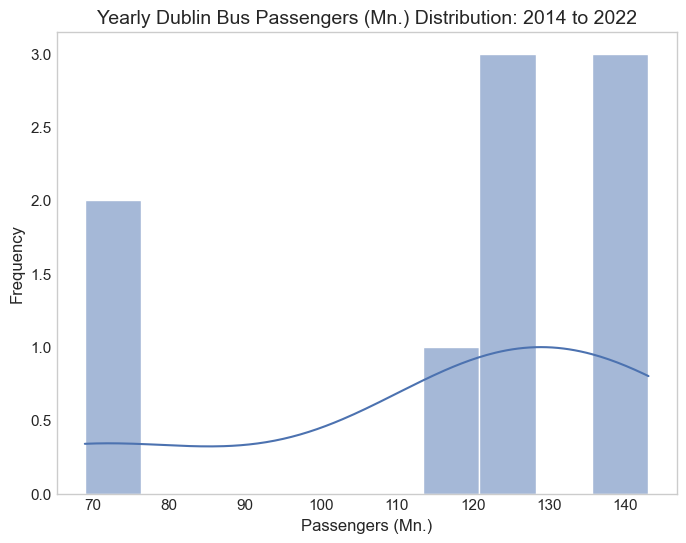

In [308]:
# Apply the Seaborn Whitegrid style
plt.style.use('seaborn-whitegrid')

# Plot the distribution of values in the 'Passengers (Mn.)' column using a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(ire_dub_bus_yearly_passengers['Passengers (Mn.)'], kde = True, color = 'b', bins = 10, alpha = 0.5)
plt.title('Yearly Dublin Bus Passengers (Mn.) Distribution: 2014 to 2022', size = 14)
plt.xlabel('Passengers (Mn.)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.grid(False)
plt.show()

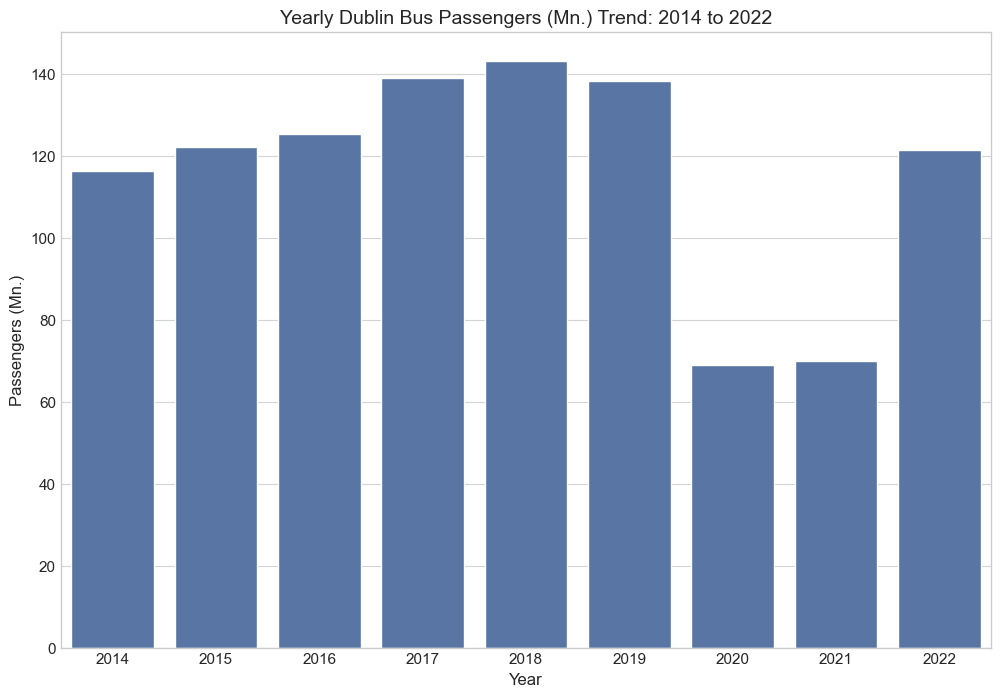

In [309]:
# Plot the yearly passenger totals using a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data = ire_dub_bus_yearly_passengers, x = 'Year', y = 'Passengers (Mn.)', color = 'b')
plt.xlabel('Year', size = 12)
plt.ylabel('Passengers (Mn.)', size = 12)
plt.title('Yearly Dublin Bus Passengers (Mn.) Trend: 2014 to 2022', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='-', linewidth = 0.8)
plt.show()

In [310]:
# Create a new df to calculate the monthly average of passengers
ire_dub_bus_monthly_avg = (ire_dub_bus_yearly_passengers.groupby('Year')['Passengers (Mn.)'].sum() / 12).reset_index()

ire_dub_bus_monthly_avg.head(10)

Year  Passengers (Mn.)
0  2014          9.688333
1  2015         10.174167
2  2016         10.448333
3  2017         11.581667
4  2018         11.925000
5  2019         11.525833
6  2020          5.744167
7  2021          5.827500
8  2022         10.115833

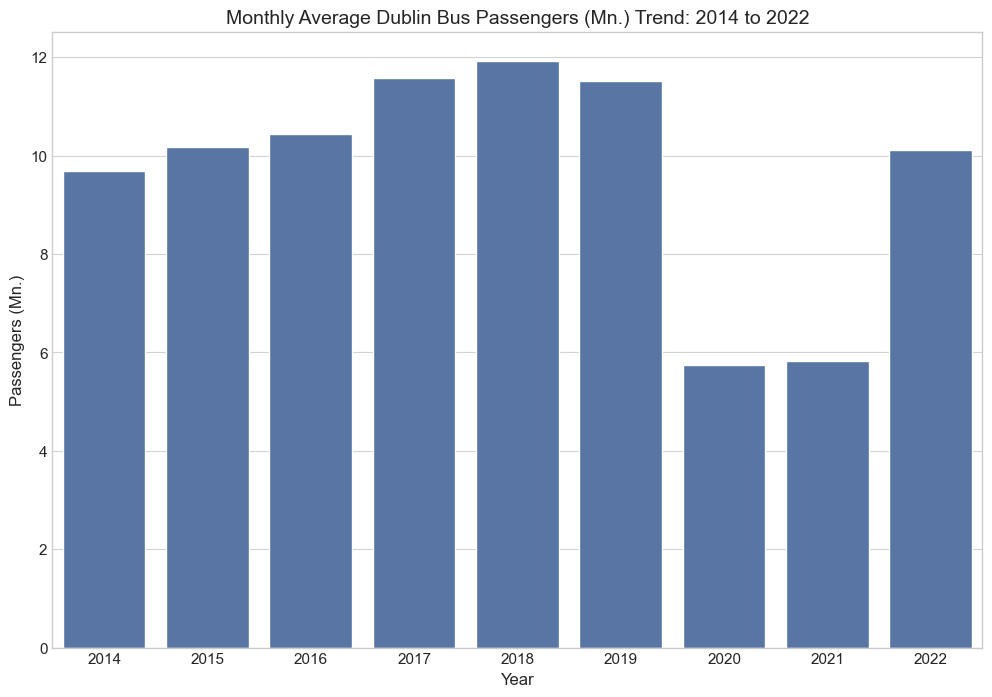

In [311]:
# Plot the monthly average passengers totals using a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data = ire_dub_bus_monthly_avg, x = 'Year', y = 'Passengers (Mn.)', color = 'b')
plt.xlabel('Year', size = 12)
plt.ylabel('Passengers (Mn.)', size = 12)
plt.title('Monthly Average Dublin Bus Passengers (Mn.) Trend: 2014 to 2022', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='-', linewidth = 0.8)
plt.show()

In [312]:
# Generate descriptive statistics
ire_dub_bus_months_passengers.describe()

Year  Passengers (Mn.)
count   108.000000        108.000000
mean   2018.000000          9.670370
std       2.594026          2.617255
min    2014.000000          1.470000
25%    2016.000000          9.115000
50%    2018.000000         10.475000
75%    2020.000000         11.360000
max    2022.000000         13.240000

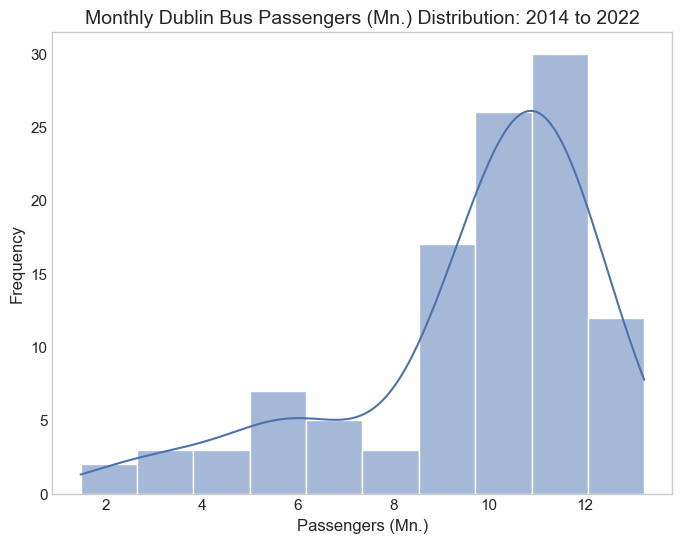

In [313]:
# Plot the distribution of values in the 'Passengers (Mn.)' column using a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(ire_dub_bus_months_passengers['Passengers (Mn.)'], kde = True, color = 'b', bins = 10, alpha = 0.5)
plt.title('Monthly Dublin Bus Passengers (Mn.) Distribution: 2014 to 2022', size = 14)
plt.xlabel('Passengers (Mn.)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.grid(False)
plt.show()

In [314]:
# Create a new df to look at 2022
ire_dub_bus_months_passengers_2022 = ire_dub_bus_months_passengers[ire_dub_bus_months_passengers['Year'] == 2022].reset_index(drop=True)

# Validate results
ire_dub_bus_months_passengers_2022.head(15)

Year      Month  Passengers (Mn.)
0   2022    January              7.10
1   2022   February              7.89
2   2022      March              9.37
3   2022      April              9.20
4   2022        May             10.14
5   2022       June             10.05
6   2022       July             10.30
7   2022     August             10.45
8   2022  September             11.65
9   2022    October             12.28
10  2022   November             12.22
11  2022   December             10.75

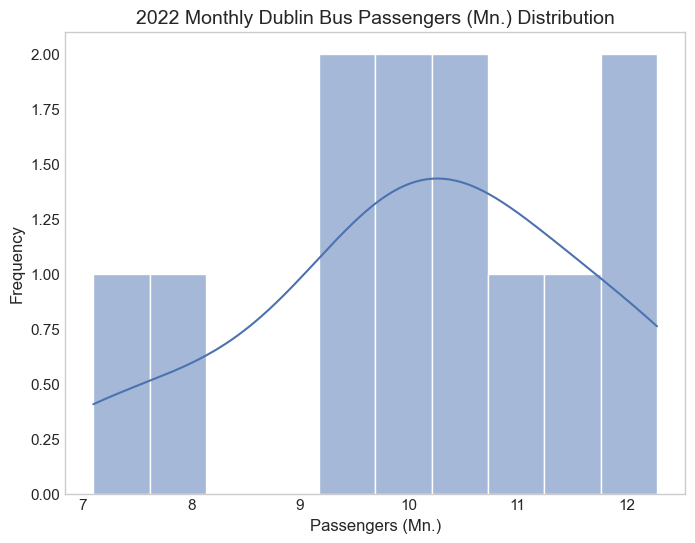

In [315]:
# Plot the 'Passengers (Mn.)' column
plt.figure(figsize=(8, 6))
sns.histplot(ire_dub_bus_months_passengers_2022['Passengers (Mn.)'], kde = True, color = 'b', bins = 10, alpha = 0.5)
plt.title('2022 Monthly Dublin Bus Passengers (Mn.) Distribution', size = 14)
plt.xlabel('Passengers (Mn.)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.grid(False)
plt.show()

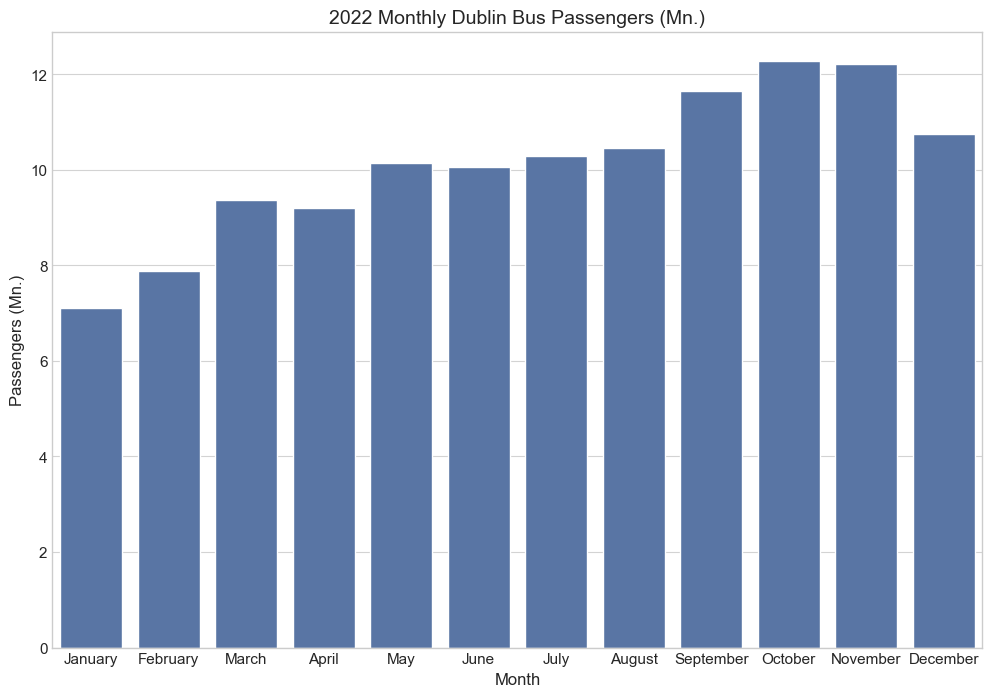

In [316]:
# Plot the monthly passenger totals using a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data = ire_dub_bus_months_passengers_2022, x = 'Month', y = 'Passengers (Mn.)', color='b')
plt.xlabel('Month', size = 12)
plt.ylabel('Passengers (Mn.)', size = 12)
plt.title('2022 Monthly Dublin Bus Passengers (Mn.)', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='-', linewidth = 0.8)
plt.show()

In [317]:
# Create a new df to look at 2019
ire_dub_bus_months_passengers_2019 = ire_dub_bus_months_passengers[ire_dub_bus_months_passengers['Year'] == 2019].reset_index(drop=True)

# Validate results
ire_dub_bus_months_passengers_2019.head(15)

Year      Month  Passengers (Mn.)
0   2019    January             11.22
1   2019   February             11.11
2   2019      March             11.96
3   2019      April             11.29
4   2019        May             11.81
5   2019       June             10.57
6   2019       July             11.76
7   2019     August             10.93
8   2019  September             11.90
9   2019    October             12.61
10  2019   November             12.24
11  2019   December             10.92

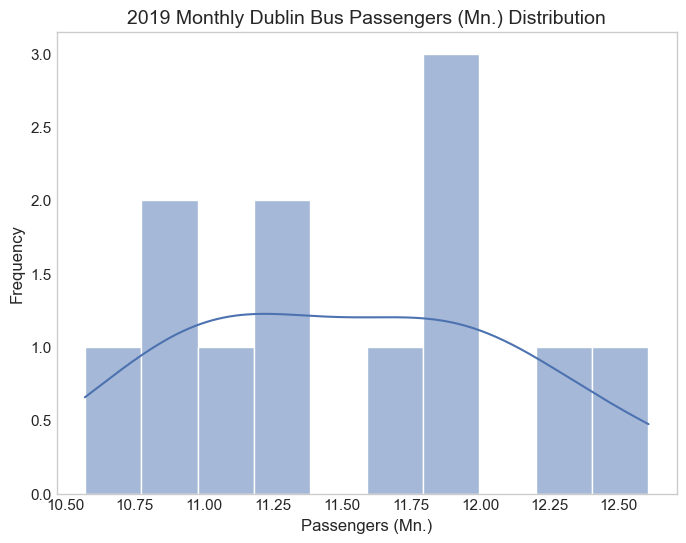

In [318]:
# Plot the 'Passengers (Mn.)' column
plt.figure(figsize=(8, 6))
sns.histplot(ire_dub_bus_months_passengers_2019['Passengers (Mn.)'], kde = True, color = 'b', bins = 10, alpha = 0.5)
plt.title('2019 Monthly Dublin Bus Passengers (Mn.) Distribution', size = 14)
plt.xlabel('Passengers (Mn.)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.grid(False)
plt.show()

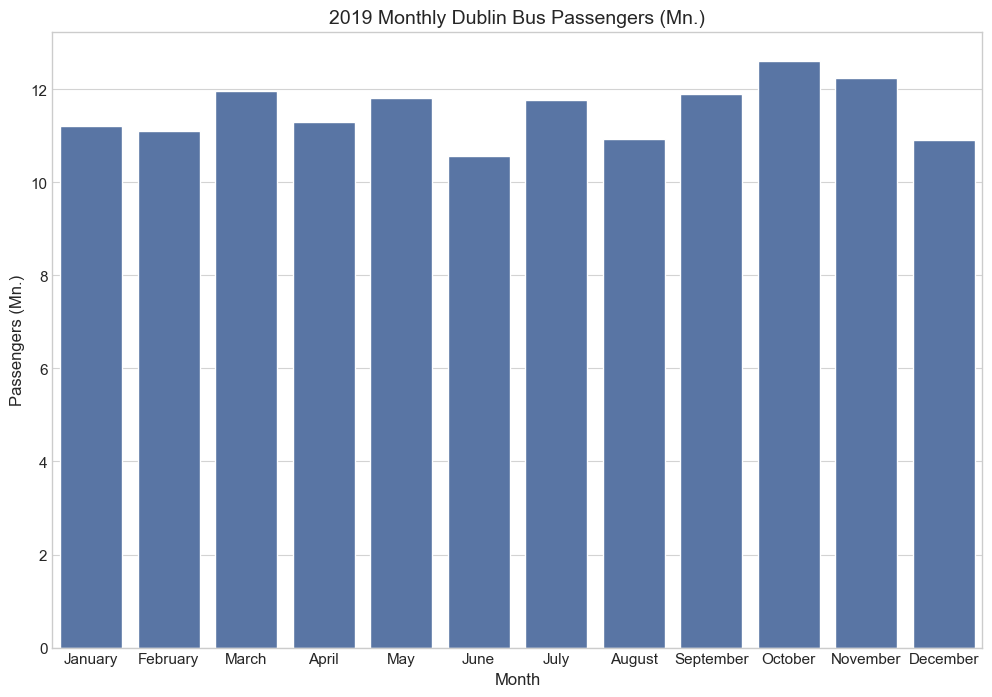

In [319]:
# Plot the monthly passenger totals using a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data = ire_dub_bus_months_passengers_2019, x = 'Month', y = 'Passengers (Mn.)', color = 'b')
plt.xlabel('Month', size = 12)
plt.ylabel('Passengers (Mn.)', size = 12)
plt.title('2019 Monthly Dublin Bus Passengers (Mn.)', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='-', linewidth = 0.8)
plt.show()

In [320]:
# Create a dictionary to map seasons
season_dict = {'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring', 
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Autumn', 'October': 'Autumn', 
    'November': 'Autumn', 'December': 'Winter'}

# Create the 'Season' column
ire_dub_bus_months_passengers['Season'] = ire_dub_bus_months_passengers['Month'].map(season_dict)

ire_dub_bus_months_passengers.head(12)

Year      Month  Passengers (Mn.)  Season
0   2014    January              8.99  Winter
1   2014   February              9.12  Winter
2   2014      March             10.33  Spring
3   2014      April              9.65  Spring
4   2014        May              9.44  Spring
5   2014       June              9.10  Summer
6   2014       July              9.25  Summer
7   2014     August              9.35  Summer
8   2014  September             10.29  Autumn
9   2014    October             10.75  Autumn
10  2014   November             10.55  Autumn
11  2014   December              9.46  Winter

In [321]:
# Sum total 'Passengers (Mn.)' for each 'Year' and 'Season'
seasonal_passengers = ire_dub_bus_months_passengers.groupby(['Year', 'Season'])['Passengers (Mn.)'].sum().unstack()

seasonal_passengers.head()

Season  Autumn  Spring  Summer  Winter
Year                                  
2014     31.59   29.42   27.70   27.57
2015     33.46   29.95   29.33   29.35
2016     31.12   32.62   30.68   30.96
2017     38.00   34.66   33.96   32.35
2018     38.46   35.86   35.24   33.56

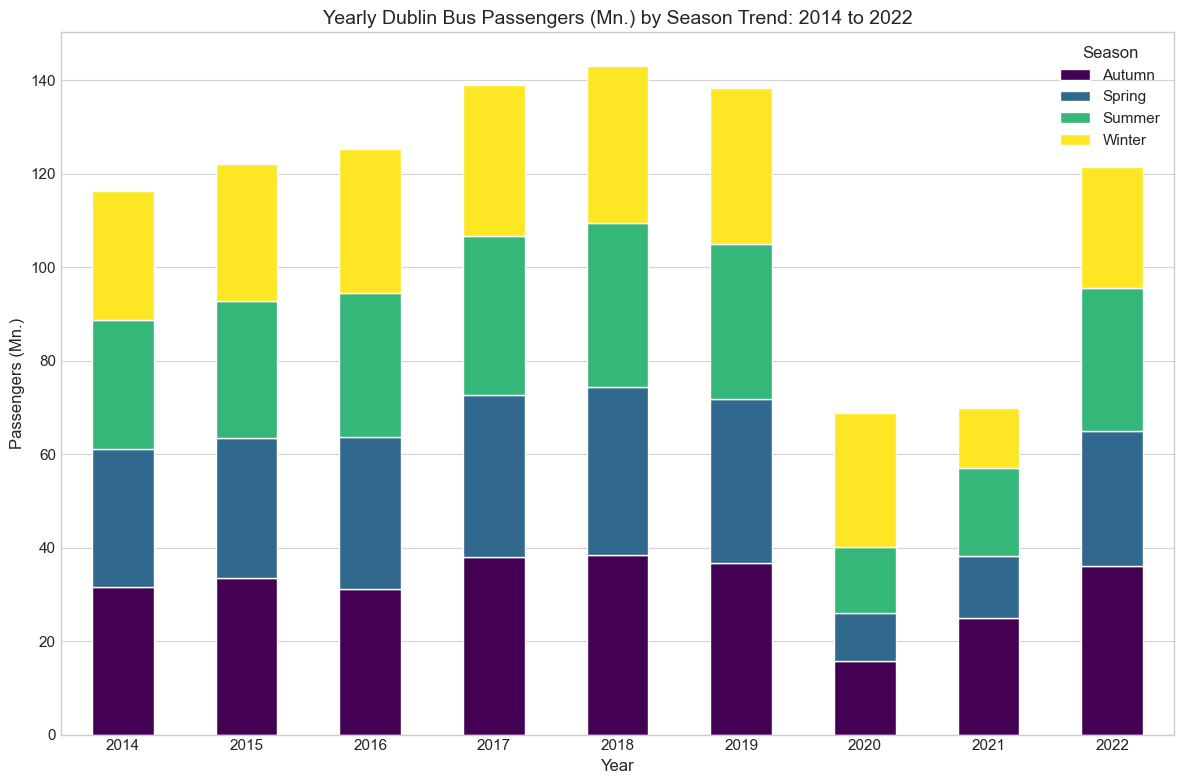

In [322]:
# Plot a stacked bar chart to show 'Passengers (Mn.)' for each 'Year' and 'Season'
plt.figure(figsize = (12, 8))
seasonal_passengers.plot(kind = 'bar', stacked = True, figsize = (12, 8), colormap = 'viridis', ax = plt.gca())

plt.title('Yearly Dublin Bus Passengers (Mn.) by Season Trend: 2014 to 2022', size = 14)
plt.xlabel('Year', size = 12)
plt.ylabel('Passengers (Mn.)', size = 12)
plt.legend(title = 'Season')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.gca().yaxis.grid(True, color = 'lightgrey', linestyle = '-', linewidth = 0.8)
plt.gca().xaxis.grid(False)
plt.show()

In [323]:
ire_dub_bus_months_passengers.head()

Year     Month  Passengers (Mn.)  Season
0  2014   January              8.99  Winter
1  2014  February              9.12  Winter
2  2014     March             10.33  Spring
3  2014     April              9.65  Spring
4  2014       May              9.44  Spring

In [327]:
# Mapping months to quarters
month_to_quarter = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

In [329]:
# Apply the mapping to the dataset
ire_dub_bus_months_passengers['Quarter'] = ire_dub_bus_months_passengers['Month'].map(month_to_quarter)

# Group by year and quarter, summing the passengers
ireland_quarterly_data = ire_dub_bus_months_passengers.groupby(['Year', 'Quarter', 'Season'])['Passengers (Mn.)'].sum().reset_index()

ireland_quarterly_data.head()

Year Quarter  Passengers (Mn.)
0  2014      Q1             28.44
1  2014      Q2             28.19
2  2014      Q3             28.89
3  2014      Q4             30.76
4  2015      Q1             29.72

In [330]:
# Define csv url paths stored on GitHub
norway_stats_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s1_ca2/datasets/Statistics%20Norway/SN_11347_public_transport_2005_to_2023.csv'

# Create Pandas dataframes
norway_stats = pd.read_csv(norway_stats_url)

In [331]:
# Validate successful data load and df creation
norway_stats.head()

Mode of Transport Type of Route Quarter  \
0  All modes of transportation         Total  2005K1   
1  All modes of transportation         Total  2005K2   
2  All modes of transportation         Total  2005K3   
3  All modes of transportation         Total  2005K4   
4  All modes of transportation         Total  2006K1   

  Ticket Revenues (NOK 1,000) Passengers (1,000 Passengers)  \
0                     1778164                        114812   
1                     1837285                        107736   
2                     1837864                         98664   
3                     1906634                        116841   
4                     1910865                        119340   

  Passengers with School Transport (1,000 Passengers)  \
0                                                 ..    
1                                                 ..    
2                                                 ..    
3                                                 ..    
4                                                 ..    

  Ordinary Travellers (1,000 Passengers)  
0                                     ..  
1                                     ..  
2                                     ..  
3                                     ..  
4                                     ..

In [332]:
# Review df info
norway_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Mode of Transport                                    1111 non-null   object
 1   Type of Route                                        1110 non-null   object
 2   Quarter                                              1110 non-null   object
 3   Ticket Revenues (NOK 1,000)                          1110 non-null   object
 4   Passengers (1,000 Passengers)                        1110 non-null   object
 5   Passengers with School Transport (1,000 Passengers)  1110 non-null   object
 6   Ordinary Travellers (1,000 Passengers)               1110 non-null   object
dtypes: object(7)
memory usage: 60.9+ KB


In [333]:
# Total number of rows and columns
print('norway_stats:')
print(norway_stats.shape)
print()

# Rows containing duplicate data
norway_stats_dup_rows = norway_stats[norway_stats.duplicated()]
print('Number of duplicate rows:')
print(norway_stats.shape)
print()

# Used to count the number of rows before removing the data
print('Row count before removing duplicates:')
print()
print(norway_stats.count())
print()

# Dropping the duplicates
norway_stats = norway_stats.drop_duplicates()

# Counting the number of rows after removing duplicates.
print('Row count after removing duplicates:')
print()
print(norway_stats.count())
print()

norway_stats:
(1111, 7)

Number of duplicate rows:
(1111, 7)

Row count before removing duplicates:

Mode of Transport                                      1111
Type of Route                                          1110
Quarter                                                1110
Ticket Revenues (NOK 1,000)                            1110
Passengers (1,000 Passengers)                          1110
Passengers with School Transport (1,000 Passengers)    1110
Ordinary Travellers (1,000 Passengers)                 1110
dtype: int64

Row count after removing duplicates:

Mode of Transport                                      1111
Type of Route                                          1110
Quarter                                                1110
Ticket Revenues (NOK 1,000)                            1110
Passengers (1,000 Passengers)                          1110
Passengers with School Transport (1,000 Passengers)    1110
Ordinary Travellers (1,000 Passengers)                 1110
dtype: 

In [334]:
# Filtering the DataFrame to only include rows with at least one null value
norway_stats_nulls = norway_stats[norway_stats.isnull().any(axis=1)]

norway_stats_nulls

Mode of Transport Type of Route Quarter Ticket Revenues (NOK 1,000)  \
1110         Footnotes           NaN     NaN                         NaN   

     Passengers (1,000 Passengers)  \
1110                           NaN   

     Passengers with School Transport (1,000 Passengers)  \
1110                                                NaN    

     Ordinary Travellers (1,000 Passengers)  
1110                                    NaN

In [335]:
# Dropping rows with any null values from the DataFrame
norway_stats = norway_stats.dropna()

In [336]:
# Filtering the DataFrame to only include rows with at least one null value
norway_stats_nulls = norway_stats[norway_stats.isnull().any(axis=1)]

norway_stats_nulls

Empty DataFrame
Columns: [Mode of Transport, Type of Route, Quarter, Ticket Revenues (NOK 1,000), Passengers (1,000 Passengers), Passengers with School Transport (1,000 Passengers), Ordinary Travellers (1,000 Passengers)]
Index: []

In [337]:
norway_stats.head()

Mode of Transport Type of Route Quarter  \
0  All modes of transportation         Total  2005K1   
1  All modes of transportation         Total  2005K2   
2  All modes of transportation         Total  2005K3   
3  All modes of transportation         Total  2005K4   
4  All modes of transportation         Total  2006K1   

  Ticket Revenues (NOK 1,000) Passengers (1,000 Passengers)  \
0                     1778164                        114812   
1                     1837285                        107736   
2                     1837864                         98664   
3                     1906634                        116841   
4                     1910865                        119340   

  Passengers with School Transport (1,000 Passengers)  \
0                                                 ..    
1                                                 ..    
2                                                 ..    
3                                                 ..    
4                                                 ..    

  Ordinary Travellers (1,000 Passengers)  
0                                     ..  
1                                     ..  
2                                     ..  
3                                     ..  
4                                     ..

In [179]:
# Keeping only the required columns: 'Country Name', 'Country Code', and '2022'
required_columns = ['Country Name', 'Country Code', '2022']

# Drop unwanted columns
worldbank_pop_dropped_cols = worldbank_pop[required_columns]

# Applying the filter condition
worldbank_pop_filtered = worldbank_pop_dropped_cols[(worldbank_pop_dropped_cols['2022'] >= 4500000) & (worldbank_pop_dropped_cols['2022'] <= 6000000)]

# Sorting the dataset by '2022' column in descending order
worldbank_pop_sorted = worldbank_pop_filtered.sort_values(by='2022', ascending=False)

worldbank_pop_sorted.head(20)

Country Name Country Code       2022
44                Congo, Rep.          COG  5970424.0
58                    Denmark          DNK  5903037.0
208                 Singapore          SGP  5637022.0
34   Central African Republic          CAF  5579144.0
75                    Finland          FIN  5556880.0
130                   Lebanon          LBN  5489739.0
177                    Norway          NOR  5457127.0
221           Slovak Republic          SVK  5431752.0
131                   Liberia          LBR  5302681.0
48                 Costa Rica          CRI  5180829.0
180               New Zealand          NZL  5124100.0
111                   Ireland          IRL  5086988.0
166                Mauritania          MRT  4736139.0
182                      Oman          OMN  4576298.0

In [180]:
# Creating a new column 'Population (Mn.)'
worldbank_pop_sorted['Population (Mn.)'] = (worldbank_pop_sorted['2022'] / 1000000).round(2)

worldbank_pop_sorted

Country Name Country Code       2022  Population (Mn.)
44                Congo, Rep.          COG  5970424.0              5.97
58                    Denmark          DNK  5903037.0              5.90
208                 Singapore          SGP  5637022.0              5.64
34   Central African Republic          CAF  5579144.0              5.58
75                    Finland          FIN  5556880.0              5.56
130                   Lebanon          LBN  5489739.0              5.49
177                    Norway          NOR  5457127.0              5.46
221           Slovak Republic          SVK  5431752.0              5.43
131                   Liberia          LBR  5302681.0              5.30
48                 Costa Rica          CRI  5180829.0              5.18
180               New Zealand          NZL  5124100.0              5.12
111                   Ireland          IRL  5086988.0              5.09
166                Mauritania          MRT  4736139.0              4.74
182                      Oman          OMN  4576298.0              4.58

In [181]:
# Generate descriptive statistics 
worldbank_pop_sorted.describe()

2022  Population (Mn.)
count  1.400000e+01         14.000000
mean   5.359440e+06          5.360000
std    3.953000e+05          0.394345
min    4.576298e+06          4.580000
25%    5.138282e+06          5.135000
50%    5.444440e+06          5.445000
75%    5.573578e+06          5.575000
max    5.970424e+06          5.970000

In [182]:
# Reset float display option
pd.reset_option('display.float_format')

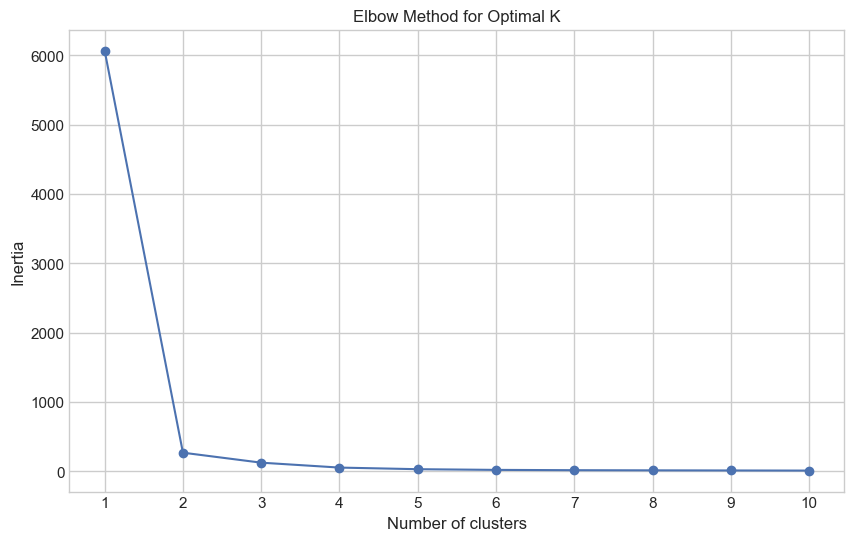

In [225]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivoted_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [228]:
# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state=0)
clusters = kmeans.fit_predict(normalized_data)

# Adding cluster information to the original pivoted data
pivoted_data['Cluster'] = clusters

# Display the first few rows of the dataset with cluster information
pivoted_data.head()

Means of Travel                             Bus  Motorcycle  Other  Rail  \
Town          County   Latitude  Longitude                                 
Abbeydorney   Kerry    52.346618 -9.687909   68           0      2     2   
Abbeyfeale    Limerick 52.385179 -9.300797   64           2     10     2   
Abbeyknockmoy Galway   53.436490 -8.748040   76           0      2     0   
Abbeyleix     Laois    52.915280 -7.347892  258           4      6    46   
Adamstown     Wexford  52.393569 -6.718557   10           0      0     0   

Means of Travel                              Car  Bicyle / On Foot  Total  \
Town          County   Latitude  Longitude                                  
Abbeydorney   Kerry    52.346618 -9.687909   604                54    730   
Abbeyfeale    Limerick 52.385179 -9.300797  1840               476   2394   
Abbeyknockmoy Galway   53.436490 -8.748040   378                18    474   
Abbeyleix     Laois    52.915280 -7.347892  1560               304   2178   
Adamstown     Wexford  52.393569 -6.718557   262                78    350   

Means of Travel                             Cluster  
Town          County   Latitude  Longitude           
Abbeydorney   Kerry    52.346618 -9.687909        0  
Abbeyfeale    Limerick 52.385179 -9.300797        0  
Abbeyknockmoy Galway   53.436490 -8.748040        0  
Abbeyleix     Laois    52.915280 -7.347892        0  
Adamstown     Wexford  52.393569 -6.718557        0

In [229]:
# Create df's to view the cluster results
cluster_0 = pivoted_data[pivoted_data['Cluster'] == 0]
cluster_1 = pivoted_data[pivoted_data['Cluster'] == 1]
cluster_2 = pivoted_data[pivoted_data['Cluster'] == 2]
cluster_3 = pivoted_data[pivoted_data['Cluster'] == 3]
cluster_4 = pivoted_data[pivoted_data['Cluster'] == 4]

In [230]:
cluster_0.head(15)

Means of Travel                                 Bus  Motorcycle  Other  Rail  \
Town             County    Latitude  Longitude                                 
Abbeydorney      Kerry     52.346618 -9.687909   68           0      2     2   
Abbeyfeale       Limerick  52.385179 -9.300797   64           2     10     2   
Abbeyknockmoy    Galway    53.436490 -8.748040   76           0      2     0   
Abbeyleix        Laois     52.915280 -7.347892  258           4      6    46   
Adamstown        Wexford   52.393569 -6.718557   10           0      0     0   
Adare            Limerick  52.563652 -8.792528  106           0      8     4   
Aghada-Rostellan Cork      51.839486 -8.214906  168           2      0    14   
Aglish           Waterford 52.071507 -7.822270   50           2      2     0   
Ahascragh        Galway    53.397613 -8.334632   12           0      6     2   
Ailt An Chorráin Donegal   54.984529 -8.432658   30           0      0     0   
Allenwood        Kildare   53.283955 -6.861840  246           8     24    20   
An Bun Beag      Donegal   55.060874 -8.300349   46           0      6     0   
An Charraig      Donegal   54.657724 -8.632748   18           0      2     2   
An Cheathrú Rua  Galway    53.264108 -9.598267   30           0      2     2   
An Clochán Liath Donegal   54.950289 -8.357363   44           4      4     4   

Means of Travel                                  Car  Bicyle / On Foot  Total  \
Town             County    Latitude  Longitude                                  
Abbeydorney      Kerry     52.346618 -9.687909   604                54    730   
Abbeyfeale       Limerick  52.385179 -9.300797  1840               476   2394   
Abbeyknockmoy    Galway    53.436490 -8.748040   378                18    474   
Abbeyleix        Laois     52.915280 -7.347892  1560               304   2178   
Adamstown        Wexford   52.393569 -6.718557   262                78    350   
Adare            Limerick  52.563652 -8.792528  1094               262   1474   
Aghada-Rostellan Cork      51.839486 -8.214906  1098               100   1382   
Aglish           Waterford 52.071507 -7.822270   272                52    378   
Ahascragh        Galway    53.397613 -8.334632   154                 8    182   
Ailt An Chorráin Donegal   54.984529 -8.432658   204                32    266   
Allenwood        Kildare   53.283955 -6.861840  1784               168   2250   
An Bun Beag      Donegal   55.060874 -8.300349   670                90    812   
An Charraig      Donegal   54.657724 -8.632748   286                62    370   
An Cheathrú Rua  Galway    53.264108 -9.598267   486               120    640   
An Clochán Liath Donegal   54.950289 -8.357363   942               220   1218   

Means of Travel                                 Cluster  
Town             County    Latitude  Longitude           
Abbeydorney      Kerry     52.346618 -9.687909        0  
Abbeyfeale       Limerick  52.385179 -9.300797        0  
Abbeyknockmoy    Galway    53.436490 -8.748040        0  
Abbeyleix        Laois     52.915280 -7.347892        0  
Adamstown        Wexford   52.393569 -6.718557        0  
Adare            Limerick  52.563652 -8.792528        0  
Aghada-Rostellan Cork      51.839486 -8.214906        0  
Aglish           Waterford 52.071507 -7.822270        0  
Ahascragh        Galway    53.397613 -8.334632        0  
Ailt An Chorráin Donegal   54.984529 -8.432658        0  
Allenwood        Kildare   53.283955 -6.861840        0  
An Bun Beag      Donegal   55.060874 -8.300349        0  
An Charraig      Donegal   54.657724 -8.632748        0  
An Cheathrú Rua  Galway    53.264108 -9.598267        0  
An Clochán Liath Donegal   54.950289 -8.357363        0

In [231]:
cluster_1.head(15)

Means of Travel                                        Bus  Motorcycle  Other  \
Town                    County Latitude  Longitude                              
Dublin city and suburbs Dublin 53.349805 -6.26031   225800        9312   2960   

Means of Travel                                       Rail     Car  \
Town                    County Latitude  Longitude                   
Dublin city and suburbs Dublin 53.349805 -6.26031   104860  689012   

Means of Travel                                     Bicyle / On Foot    Total  \
Town                    County Latitude  Longitude                              
Dublin city and suburbs Dublin 53.349805 -6.26031             440362  1472306   

Means of Travel                                     Cluster  
Town                    County Latitude  Longitude           
Dublin city and suburbs Dublin 53.349805 -6.26031         1

In [232]:
cluster_2.head(15)

Means of Travel                                             Bus  Motorcycle  \
Town                       County    Latitude  Longitude                      
Galway city and suburbs    Galway    53.274001 -9.051266  11670         316   
Limerick city and suburbs  Limerick  52.663839 -8.626730   9668         368   
Waterford city and suburbs Waterford 52.259320 -7.110070   3786         284   

Means of Travel                                           Other  Rail    Car  \
Town                       County    Latitude  Longitude                       
Galway city and suburbs    Galway    53.274001 -9.051266    208   380  57788   
Limerick city and suburbs  Limerick  52.663839 -8.626730    194   318  69568   
Waterford city and suburbs Waterford 52.259320 -7.110070    186   182  48764   

Means of Travel                                           Bicyle / On Foot  \
Town                       County    Latitude  Longitude                     
Galway city and suburbs    Galway    53.274001 -9.051266             29600   
Limerick city and suburbs  Limerick  52.663839 -8.626730             30006   
Waterford city and suburbs Waterford 52.259320 -7.110070             14232   

Means of Travel                                            Total  Cluster  
Town                       County    Latitude  Longitude                   
Galway city and suburbs    Galway    53.274001 -9.051266   99962        2  
Limerick city and suburbs  Limerick  52.663839 -8.626730  110122        2  
Waterford city and suburbs Waterford 52.259320 -7.110070   67434        2

In [233]:
cluster_3.head(15)

Means of Travel                             Bus  Motorcycle  Other  Rail  \
Town        County    Latitude  Longitude                                  
Arklow      Wicklow   52.797693 -6.159929   648          26     34   176   
Ashbourne   Meath     53.511162 -6.397382  2090          84     36    48   
Athlone     Westmeath 53.423933 -7.940690  2472          36     70   402   
Balbriggan  Dublin    53.608319 -6.182080  2650          76     60  2694   
Bray        Wicklow   53.200699 -6.110932  4460         170    114  3360   
Carlow      Carlow    52.835854 -6.932474  1208         122    114   478   
Carrigaline Cork      51.816445 -8.391249  1796          58     64    26   
Castlebar   Mayo      53.855001 -9.287926   460          12     46    52   
Cavan       Cavan     53.989719 -7.363332   846          20     48    26   
Celbridge   Kildare   53.338391 -6.539763  3912         124     34   892   
Clonmel     Tipperary 52.362352 -7.700708   756          50     46    32   
Cobh        Cork      51.853042 -8.295090  1398          30    116   606   
Drogheda    Louth     53.717856 -6.356098  6686         136    126  1208   
Dundalk     Louth     53.997945 -6.405957  4392         110     84   440   
Ennis       Clare     52.847425 -8.988738  1002          58     70   246   

Means of Travel                              Car  Bicyle / On Foot  Total  \
Town        County    Latitude  Longitude                                   
Arklow      Wicklow   52.797693 -6.159929  11320              3708  15912   
Ashbourne   Meath     53.511162 -6.397382  13612              5782  21652   
Athlone     Westmeath 53.423933 -7.940690  17500              5184  25664   
Balbriggan  Dublin    53.608319 -6.182080  17318              8868  31666   
Bray        Wicklow   53.200699 -6.110932  22580              8834  39518   
Carlow      Carlow    52.835854 -6.932474  22762              7268  31952   
Carrigaline Cork      51.816445 -8.391249  20048              3152  25144   
Castlebar   Mayo      53.855001 -9.287926  11318              3494  15382   
Cavan       Cavan     53.989719 -7.363332  10680              2234  13854   
Celbridge   Kildare   53.338391 -6.539763  16910              5594  27466   
Clonmel     Tipperary 52.362352 -7.700708  16448              3590  20922   
Cobh        Cork      51.853042 -8.295090  12322              3338  17810   
Drogheda    Louth     53.717856 -6.356098  31176             13690  53022   
Dundalk     Louth     53.997945 -6.405957  31450             11704  48180   
Ennis       Clare     52.847425 -8.988738  26250              5554  33180   

Means of Travel                            Cluster  
Town        County    Latitude  Longitude           
Arklow      Wicklow   52.797693 -6.159929        3  
Ashbourne   Meath     53.511162 -6.397382        3  
Athlone     Westmeath 53.423933 -7.940690        3  
Balbriggan  Dublin    53.608319 -6.182080        3  
Bray        Wicklow   53.200699 -6.110932        3  
Carlow      Carlow    52.835854 -6.932474        3  
Carrigaline Cork      51.816445 -8.391249        3  
Castlebar   Mayo      53.855001 -9.287926        3  
Cavan       Cavan     53.989719 -7.363332        3  
Celbridge   Kildare   53.338391 -6.539763        3  
Clonmel     Tipperary 52.362352 -7.700708        3  
Cobh        Cork      51.853042 -8.295090        3  
Drogheda    Louth     53.717856 -6.356098        3  
Dundalk     Louth     53.997945 -6.405957        3  
Ennis       Clare     52.847425 -8.988738        3

In [234]:
cluster_4.head(15)

Means of Travel                                     Bus  Motorcycle  Other  \
Town                  County Latitude  Longitude                             
Cork city and suburbs Cork   51.898514 -8.475604  25718         868    648   

Means of Travel                                   Rail     Car  \
Town                  County Latitude  Longitude                 
Cork city and suburbs Cork   51.898514 -8.475604  1218  170530   

Means of Travel                                   Bicyle / On Foot   Total  \
Town                  County Latitude  Longitude                             
Cork city and suburbs Cork   51.898514 -8.475604             59804  258786   

Means of Travel                                   Cluster  
Town                  County Latitude  Longitude           
Cork city and suburbs Cork   51.898514 -8.475604        4

In [235]:
# Create a 'Cluster' classification mapping dictionary
classification_dict = {
    1: 'City (Large)',
    2: 'Town (Large)',
    3: 'Town (Medium)',
    4: 'City (Medium)',
    0: 'Town (Small)'}
    
# Use map function to create 'Classification' column based
pivoted_data['Classification'] = pivoted_data['Cluster'].map(classification_dict)

pivoted_data.head()

Means of Travel                             Bus  Motorcycle  Other  Rail  \
Town          County   Latitude  Longitude                                 
Abbeydorney   Kerry    52.346618 -9.687909   68           0      2     2   
Abbeyfeale    Limerick 52.385179 -9.300797   64           2     10     2   
Abbeyknockmoy Galway   53.436490 -8.748040   76           0      2     0   
Abbeyleix     Laois    52.915280 -7.347892  258           4      6    46   
Adamstown     Wexford  52.393569 -6.718557   10           0      0     0   

Means of Travel                              Car  Bicyle / On Foot  Total  \
Town          County   Latitude  Longitude                                  
Abbeydorney   Kerry    52.346618 -9.687909   604                54    730   
Abbeyfeale    Limerick 52.385179 -9.300797  1840               476   2394   
Abbeyknockmoy Galway   53.436490 -8.748040   378                18    474   
Abbeyleix     Laois    52.915280 -7.347892  1560               304   2178   
Adamstown     Wexford  52.393569 -6.718557   262                78    350   

Means of Travel                             Cluster Classification  
Town          County   Latitude  Longitude                          
Abbeydorney   Kerry    52.346618 -9.687909        0   Town (Small)  
Abbeyfeale    Limerick 52.385179 -9.300797        0   Town (Small)  
Abbeyknockmoy Galway   53.436490 -8.748040        0   Town (Small)  
Abbeyleix     Laois    52.915280 -7.347892        0   Town (Small)  
Adamstown     Wexford  52.393569 -6.718557        0   Town (Small)

In [236]:
# Reset index
pivoted_data_reset_index = pivoted_data.reset_index()

pivoted_data_reset_index.head()

Means of Travel           Town    County   Latitude  Longitude  Bus  \
0                  Abbeydorney     Kerry  52.346618  -9.687909   68   
1                   Abbeyfeale  Limerick  52.385179  -9.300797   64   
2                Abbeyknockmoy    Galway  53.436490  -8.748040   76   
3                    Abbeyleix     Laois  52.915280  -7.347892  258   
4                    Adamstown   Wexford  52.393569  -6.718557   10   

Means of Travel  Motorcycle  Other  Rail   Car  Bicyle / On Foot  Total  \
0                         0      2     2   604                54    730   
1                         2     10     2  1840               476   2394   
2                         0      2     0   378                18    474   
3                         4      6    46  1560               304   2178   
4                         0      0     0   262                78    350   

Means of Travel  Cluster Classification  
0                      0   Town (Small)  
1                      0   Town (Small)  
2                      0   Town (Small)  
3                      0   Town (Small)  
4                      0   Town (Small)

In [237]:
# Create 'Public' & 'Private' transport columns
pivoted_data_reset_index['Public'] = pivoted_data_reset_index['Bus'] + pivoted_data_reset_index['Rail']
pivoted_data_reset_index['Private'] = pivoted_data_reset_index['Motorcycle'] + pivoted_data_reset_index['Car']

# Create 'Public to Private Ratio' transport column
pivoted_data_reset_index['Public to Private Ratio'] = pivoted_data_reset_index['Public'] / pivoted_data_reset_index['Private']

pivoted_data_reset_index.head()

Means of Travel           Town    County   Latitude  Longitude  Bus  \
0                  Abbeydorney     Kerry  52.346618  -9.687909   68   
1                   Abbeyfeale  Limerick  52.385179  -9.300797   64   
2                Abbeyknockmoy    Galway  53.436490  -8.748040   76   
3                    Abbeyleix     Laois  52.915280  -7.347892  258   
4                    Adamstown   Wexford  52.393569  -6.718557   10   

Means of Travel  Motorcycle  Other  Rail   Car  Bicyle / On Foot  Total  \
0                         0      2     2   604                54    730   
1                         2     10     2  1840               476   2394   
2                         0      2     0   378                18    474   
3                         4      6    46  1560               304   2178   
4                         0      0     0   262                78    350   

Means of Travel  Cluster Classification  Public  Private  \
0                      0   Town (Small)      70      604   
1                      0   Town (Small)      66     1842   
2                      0   Town (Small)      76      378   
3                      0   Town (Small)     304     1564   
4                      0   Town (Small)      10      262   

Means of Travel  Public to Private Ratio  
0                               0.115894  
1                               0.035831  
2                               0.201058  
3                               0.194373  
4                               0.038168

In [238]:
# Preparing the data for the plot
# Grouping by 'Classification' and summing up the 'Public', 'Private', and 'Other' counts
grouped_data = pivoted_data_reset_index.groupby('Classification')[['Public', 'Private', 'Other']].sum()

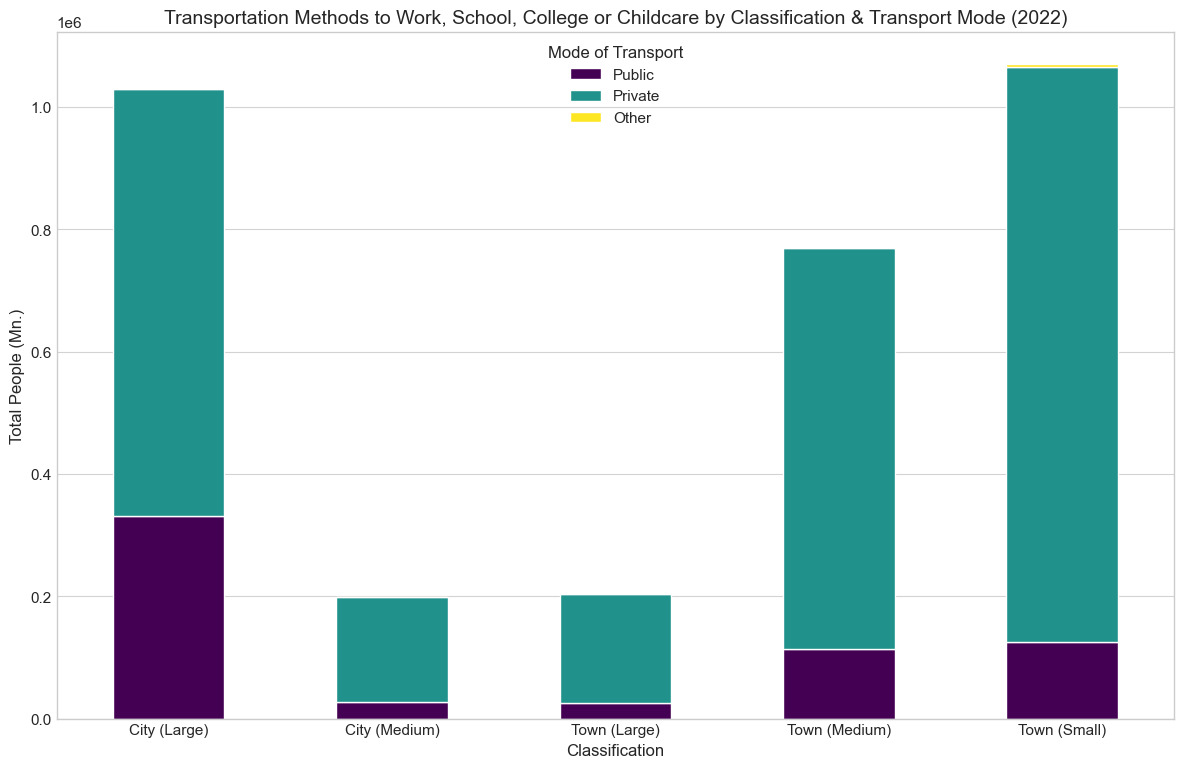

In [239]:
# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', ax=plt.gca())

# Setting the plot title and labels
plt.title('Transportation Methods to Work, School, College or Childcare by Classification & Transport Mode (2022)', size=14)
plt.xlabel('Classification', size = 12)
plt.ylabel('Total People (Mn.)', size = 12)
plt.legend(title = 'Mode of Transport')
plt.xticks(rotation = 0)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, color = 'lightgrey', linestyle = '-', linewidth = 0.8)
plt.gca().xaxis.grid(False)
plt.tight_layout()
plt.show()

In [240]:
# Preparing the data for the plot
# Grouping by 'Classification' and summing up the 'Public', 'Private', and 'Other' counts
grouped_data_by_method = pivoted_data_reset_index.groupby('Classification')[['Bus','Motorcycle','Other','Rail','Car','Bicyle / On Foot']].sum()

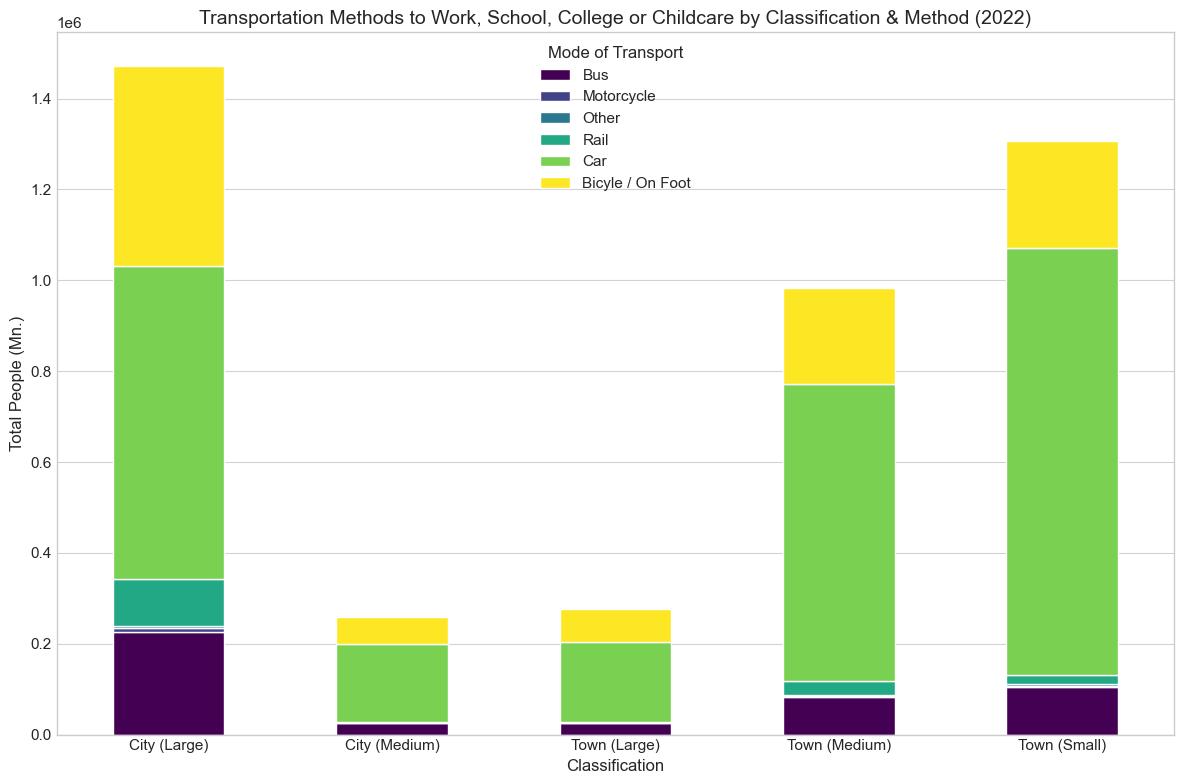

In [241]:
# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
grouped_data_by_method.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', ax=plt.gca())

# Setting the plot title and labels
plt.title('Transportation Methods to Work, School, College or Childcare by Classification & Method (2022)', size=14)
plt.xlabel('Classification', size = 12)
plt.ylabel('Total People (Mn.)', size = 12)
plt.legend(title = 'Mode of Transport')
plt.xticks(rotation = 0)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(True, color = 'lightgrey', linestyle = '-', linewidth = 0.8)
plt.gca().xaxis.grid(False)
plt.tight_layout()
plt.show()

In [242]:
import plotly.express as px

# Plot the geo spaital map
fig = px.scatter_mapbox(pivoted_data_reset_index, lat = 'Latitude', lon = 'Longitude', size = 'Total',
                        size_max = 60, opacity = 0.60, zoom = 6.3, mapbox_style = 'open-street-map', 
                       hover_name = 'Town')

# Define the figure layout coordinates
new_center_lat = 53.42393  
new_center_lon = -7.94069

# Set the figure size to 12x12 inches
fig.update_layout(width=900, height=1000)
fig.update_layout(mapbox_center_lat=new_center_lat, mapbox_center_lon=new_center_lon)
fig.update_layout(
    title='Transportation Methods to Work, School, College or Childcare Interactive Map (2022)', 
    title_font_size=14, 
    title_x=0.5,  # Centers the title
    title_font=dict(family="Arial Bold, sans-serif", size = 16, color='black')
)


# Show the plot
fig.show()

In [243]:
# Grouping by 'County' and summing 'Private' and 'Public' columns
pivot_grouped = pivoted_data_reset_index.groupby('County')[['Public', 'Private']].sum()

# Recreate Public to Private Ratio
pivot_grouped['Public to Private Ratio'] = pivot_grouped['Public'] / pivot_grouped['Private']

# Reset index
pivot_grouped = pivot_grouped.reset_index()

pivot_grouped.head()

Means of Travel   County  Public  Private  Public to Private Ratio
0                 Carlow    2986    36152                 0.082596
1                  Cavan    3114    30246                 0.102956
2                  Clare    4196    59216                 0.070859
3                   Cork   45646   351680                 0.129794
4                Donegal    8736    68782                 0.127010

In [244]:
# Load the shapefile for county boundaries
shapefile_path = 'cso_county_boundaries.geojson'
latest_map_df = gpd.read_file(shapefile_path)

latest_map_df.head()

ESRI_OID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0         1   50000    DONEGAL       Dún na nGall     100013   
1         2  120000   LIMERICK          Luimneach     100022   
2         3   80000    KILDARE          Cill Dara     100007   
3         4  220000  WATERFORD        Port Láirge     100026   
4         5  260000     DUBLIN  Baile Átha Cliath     100002   

                                   GUID             CONTAE     COUNTY  \
0  2ae19629-1452-13a3-e055-000000000001       Dún na nGall    DONEGAL   
1  2ae19629-1440-13a3-e055-000000000001          Luimneach   LIMERICK   
2  2ae19629-1455-13a3-e055-000000000001          Cill Dara    KILDARE   
3  2ae19629-144b-13a3-e055-000000000001        Port Láirge  WATERFORD   
4  2ae19629-144f-13a3-e055-000000000001  Baile Átha Cliath     DUBLIN   

   PROVINCE  CENTROID_X  CENTROID_Y          AREA  SHAPE_Length  SHAPE_Area  \
0    Ulster   607296.31   911848.45  4.860754e+09     21.083565    0.681155   
1   Munster   548318.75   640943.05  2.754926e+09      4.637499    0.364626   
2  Leinster   678993.60   712090.40  1.694083e+09      3.578930    0.227791   
3   Munster   630336.80   599955.37  1.857038e+09      5.170598    0.244033   
4  Leinster   714929.28   740960.44  9.257609e+08      4.255946    0.125052   

                                            geometry  
0  MULTIPOLYGON (((-8.08205 55.16002, -8.08180 55...  
1  MULTIPOLYGON (((-8.50899 52.74616, -8.50808 52...  
2  MULTIPOLYGON (((-6.49499 53.35338, -6.49314 53...  
3  MULTIPOLYGON (((-7.59463 52.09696, -7.58791 52...  
4  MULTIPOLYGON (((-6.44953 53.39354, -6.44813 53...

In [245]:
# Convert 'COUNTY' values from Uppercase to Title case
latest_map_df['COUNTY'] = latest_map_df['COUNTY'].str.title()

latest_map_df.head()

ESRI_OID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0         1   50000    DONEGAL       Dún na nGall     100013   
1         2  120000   LIMERICK          Luimneach     100022   
2         3   80000    KILDARE          Cill Dara     100007   
3         4  220000  WATERFORD        Port Láirge     100026   
4         5  260000     DUBLIN  Baile Átha Cliath     100002   

                                   GUID             CONTAE     COUNTY  \
0  2ae19629-1452-13a3-e055-000000000001       Dún na nGall    Donegal   
1  2ae19629-1440-13a3-e055-000000000001          Luimneach   Limerick   
2  2ae19629-1455-13a3-e055-000000000001          Cill Dara    Kildare   
3  2ae19629-144b-13a3-e055-000000000001        Port Láirge  Waterford   
4  2ae19629-144f-13a3-e055-000000000001  Baile Átha Cliath     Dublin   

   PROVINCE  CENTROID_X  CENTROID_Y          AREA  SHAPE_Length  SHAPE_Area  \
0    Ulster   607296.31   911848.45  4.860754e+09     21.083565    0.681155   
1   Munster   548318.75   640943.05  2.754926e+09      4.637499    0.364626   
2  Leinster   678993.60   712090.40  1.694083e+09      3.578930    0.227791   
3   Munster   630336.80   599955.37  1.857038e+09      5.170598    0.244033   
4  Leinster   714929.28   740960.44  9.257609e+08      4.255946    0.125052   

                                            geometry  
0  MULTIPOLYGON (((-8.08205 55.16002, -8.08180 55...  
1  MULTIPOLYGON (((-8.50899 52.74616, -8.50808 52...  
2  MULTIPOLYGON (((-6.49499 53.35338, -6.49314 53...  
3  MULTIPOLYGON (((-7.59463 52.09696, -7.58791 52...  
4  MULTIPOLYGON (((-6.44953 53.39354, -6.44813 53...

In [246]:
# Merge datasets
county_map = pd.merge(pivot_grouped, latest_map_df, how = 'outer', left_on = 'County', right_on = 'COUNTY')

county_map.head()

County  Public  Private  Public to Private Ratio  ESRI_OID  CO_ID  \
0   Carlow    2986    36152                 0.082596        16  10000   
1    Cavan    3114    30246                 0.102956        15  20000   
2    Clare    4196    59216                 0.070859        26  30000   
3     Cork   45646   351680                 0.129794         9  40000   
4  Donegal    8736    68782                 0.127010         1  50000   

   ENGLISH       GAEILGE LOGAINM_ID                                  GUID  \
0   CARLOW   Ceatharlach     100004  2ae19629-143d-13a3-e055-000000000001   
1    CAVAN     An Cabhán     100003  2ae19629-1448-13a3-e055-000000000001   
2    CLARE       An Clár     100009  2ae19629-1450-13a3-e055-000000000001   
3     CORK      Corcaigh     100010  2ae19629-1451-13a3-e055-000000000001   
4  DONEGAL  Dún na nGall     100013  2ae19629-1452-13a3-e055-000000000001   

         CONTAE   COUNTY  PROVINCE  CENTROID_X  CENTROID_Y          AREA  \
0   Ceatharlach   Carlow  Leinster   680448.23   660624.58  8.963062e+08   
1     An Cabhán    Cavan    Ulster   638764.82   809776.33  1.931225e+09   
2       An Clár    Clare   Munster   524790.20   680078.02  3.448615e+09   
3      Corcaigh     Cork   Munster   527532.69   573117.78  7.502635e+09   
4  Dún na nGall  Donegal    Ulster   607296.31   911848.45  4.860754e+09   

   SHAPE_Length  SHAPE_Area                                           geometry  
0      2.615375    0.119241  MULTIPOLYGON (((-6.95857 52.53753, -6.95516 52...  
1      4.554577    0.264635  MULTIPOLYGON (((-7.27794 54.10229, -7.27339 54...  
2      6.347264    0.460012  MULTIPOLYGON (((-8.74429 52.67602, -8.74883 52...  
3     21.515135    0.980154  MULTIPOLYGON (((-8.88272 52.33197, -8.88472 52...  
4     21.083565    0.681155  MULTIPOLYGON (((-8.08205 55.16002, -8.08180 55...

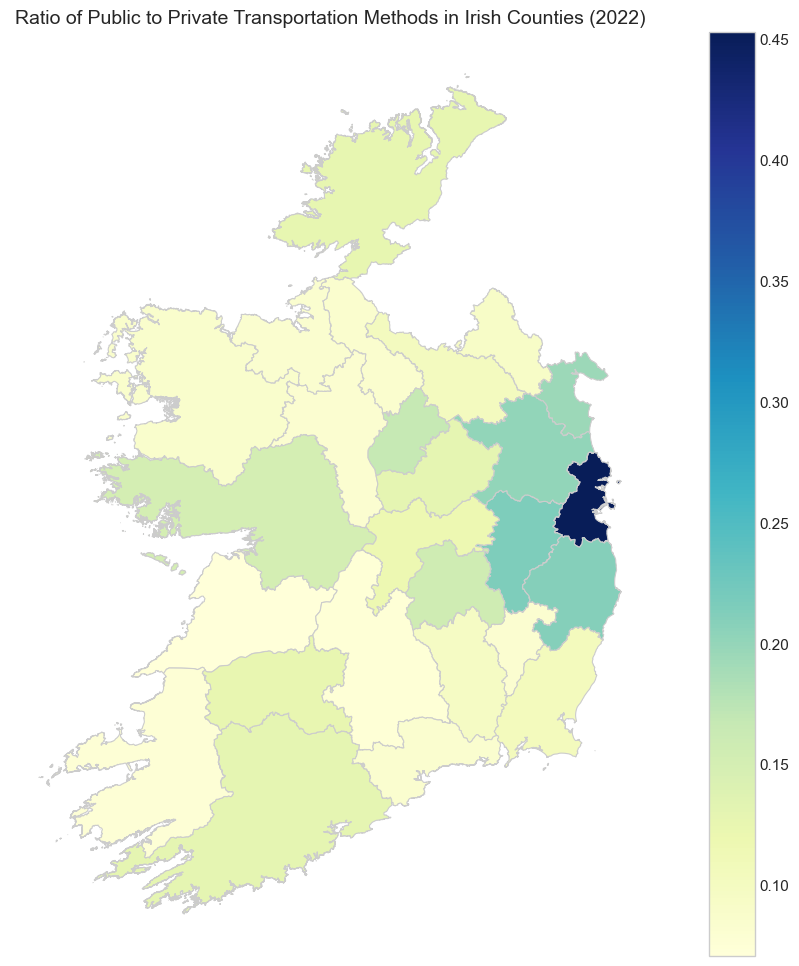

In [247]:
# Convert the dataset into a GeoDataFrame
geo_df = gpd.GeoDataFrame(county_map, geometry=county_map['geometry'])

# Plotting the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 12))
geo_df.plot(column='Public to Private Ratio', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Remove the axis
ax.axis('off')

# Add a title
ax.set_title('Ratio of Public to Private Transportation Methods in Irish Counties (2022)', fontdict = {'fontsize': '14', 'fontweight' : '3'})

# Display the map
plt.show()

In [248]:
import folium
from folium import Choropleth

# Create a folium map centered on a location (you can adjust the coordinates and zoom level)
m = folium.Map(location=[53.349805, -6.26031], zoom_start = 7)

# Create a Choropleth layer for the GeoDataFrame
Choropleth(
    geo_data=geo_df,
    data=geo_df,
    columns=['County', 'Public to Private Ratio'],
    key_on='feature.properties.County',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Public to Private Ratio'
).add_to(m)

# Add a title
folium.map.LayerControl('topright').add_to(m)
m.save('interactive_map.html')

In [249]:
pivoted_data_reset_index.head()

Means of Travel           Town    County   Latitude  Longitude  Bus  \
0                  Abbeydorney     Kerry  52.346618  -9.687909   68   
1                   Abbeyfeale  Limerick  52.385179  -9.300797   64   
2                Abbeyknockmoy    Galway  53.436490  -8.748040   76   
3                    Abbeyleix     Laois  52.915280  -7.347892  258   
4                    Adamstown   Wexford  52.393569  -6.718557   10   

Means of Travel  Motorcycle  Other  Rail   Car  Bicyle / On Foot  Total  \
0                         0      2     2   604                54    730   
1                         2     10     2  1840               476   2394   
2                         0      2     0   378                18    474   
3                         4      6    46  1560               304   2178   
4                         0      0     0   262                78    350   

Means of Travel  Cluster Classification  Public  Private  \
0                      0   Town (Small)      70      604   
1                      0   Town (Small)      66     1842   
2                      0   Town (Small)      76      378   
3                      0   Town (Small)     304     1564   
4                      0   Town (Small)      10      262   

Means of Travel  Public to Private Ratio  
0                               0.115894  
1                               0.035831  
2                               0.201058  
3                               0.194373  
4                               0.038168

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
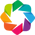

Column
    [0] Markdown(str)
    [1] Select(options=['Kerry', 'Limerick', ...], value='Kerry')
    [2] Select(options=['Abbeydorney', ...], value='Abbeydorney')
    [3] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)

In [250]:
import pandas as pd
import holoviews as hv
from holoviews import opts
import panel as pn
hv.extension('bokeh')

# Load the dataset
# pivoted_data_reset_index = pd.read_csv('path_to_your_csv_file.csv')  # Uncomment and replace with your file path

# Function to plot bar chart for a selected town
def plot_town(town):
    town_data = pivoted_data_reset_index[pivoted_data_reset_index['Town'] == town]
    town_data = town_data[['Bus', 'Motorcycle', 'Other', 'Rail', 'Car', 'Bicyle / On Foot']]
    return hv.Bars(town_data.melt(var_name='Transportation', value_name='Count'), ['Transportation'], 'Count').opts(
        opts.Bars(color=hv.Cycle('Category10'), width=600, height=400, tools=['hover'], show_grid=True, 
                  gridstyle={'grid_line_color': 'grey', 'grid_line_width': 0.5, 'grid_line_dash': [6, 4],
                             'minor_xgrid_line_color': None, 'minor_ygrid_line_color': None,
                             'xgrid_line_color': None})
    )
    

# Dropdown for counties
counties = pivoted_data_reset_index['County'].unique().tolist()
county_select = pn.widgets.Select(name='Select County', options=counties)

# Dropdown for towns (initially empty)
town_select = pn.widgets.Select(name='Select Town', options=[])

# Update towns based on selected county
@pn.depends(county_select.param.value, watch=True)
def update_towns(county):
    towns = pivoted_data_reset_index[pivoted_data_reset_index['County'] == county]['Town'].unique()
    town_select.options = towns.tolist()
    town_select.value = towns[0] if len(towns) > 0 else None

# Bind the function to the town widget
bound_plot_town = pn.bind(plot_town, town_select)

# Dynamic map using the bound function
dynamic_map = hv.DynamicMap(bound_plot_town)

# Initialize the dropdown values
county_select.value = counties[0]
update_towns(counties[0])

# Dashboard title
title = 'Transportation Methods to Work, School, College or Childcare Interactive Dashboard (2022)'

# Layout
layout = pn.Column(pn.pane.Markdown(f'# {title}'), county_select, town_select, dynamic_map)
layout.servable()


In [80]:
ire_dub_bus_months_passengers.to_csv('ire_dub_bus_months_passengers.csv')

### Twitter API Extraction

In [111]:
import tweepy

consumer_key = "****" # Your API/Consumer key 
consumer_secret = "****" # Your API/Consumer Secret Key
access_token = "****"   # Your Access token key
access_token_secret = "****" # Your Access token Secret key

# Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

# Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)


search_query = "'dublin' 'bus'-filter:retweets AND -filter:replies AND -filter:links"
no_of_tweets = 1

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')
    
    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
    
    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product


I initially created a Twitter developer account so I could access the Twitter API and pull tweets as part of sentiment analysis using the Python library 'tweepy' which is an easy-to-use Python library for accessing the Twitter API.

https://developer.twitter.com/en/portal/dashboard
<br>https://www.tweepy.org/

Using the YouTube tutorial below I followed the steps using the 'tweepy' Python package and the above code to try and pull tweets where the text 'dublin bus' was present, setting the 'no_of_tweets = 1' to test that my connection was correctly set up. However Twitter have now changed their free account usage so users are not allowed to pull tweets for free anymore and the below error message is received:

Error Message:

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

Tutorials where code was leveraged:

https://www.youtube.com/watch?v=fHHDM2-If9g
https://github.com/analyticswithadam/Python/blob/main/Pulling_Tweets.ipynb

### Reddit API Extraction

In [84]:
import praw

# Replace the following with your own information
client_id = "***"
client_secret = "***"
user_agent = "***"
username = "***"
password = "***"

# Create a Reddit instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
    username=username,
    password=password)

In [85]:
# Specify search query for Reddit API
query = 'public transport'

# Create a list to store data
posts = []

# Search for the query in posts
for submission in reddit.subreddit('Ireland').search(query, sort = 'all', limit = None):
    posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.url, 
                  submission.num_comments, submission.selftext, submission.created])

# Create a pandas df with API query results and column headers
columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created']
df = pd.DataFrame(posts, columns = columns)

# Convert the 'created' column timestamp to a readable format
df['created'] = pd.to_datetime(df['created'], unit='s')

df.head()

df.to_csv('reddit_comments.csv', index = False)

title  score       id  \
0  Eamon Ryan: Free public transport would 'incre...    912  11ksg57   
1  Dublin is worst capital in Europe for public t...   1330  1379naz   
2  Oddest experience you’ve ever had on Irish pub...    430  127gzo8   
3  Poll: Would you support a subsidised €9 monthl...    288  15y2344   
4  'Too many cars' on our roads hampering public ...    171  185t7vv   

  subreddit                                                url  num_comments  \
0   ireland  https://www.irishexaminer.com/news/arid-410867...           705   
1   ireland  https://www.irishtimes.com/environment/climate...           277   
2   ireland  https://www.reddit.com/r/ireland/comments/127g...           468   
3   ireland  https://www.thejournal.ie/poll-your-say-2-6148...           186   
4   ireland  https://www.thejournal.ie/dublin-bus-transport...           274   

                                                body             created  
0                                                    2023-03-07 07:18:55  
1  Shame they didn't mention speed to get in and ... 2023-05-04 04:16:19  
2  What’s the weirdest thing you’ve ever gone thr... 2023-03-31 10:35:40  
3                                                    2023-08-22 10:44:13  
4                                                    2023-11-28 10:43:01

Like Twitter, Reddit is another large social network of communities where people gather to discuss various topics.

I created an application in my Reddit account called 'web_scraper_api', and using the 'praw' (Python Reddit API Wrapper) library I was able to pull posts based on my specific query criteria e.g. posts with the words 'public transport' in the Subreddit 'Ireland' to ensure that the results are relevant.

https://praw.readthedocs.io/en/stable/index.html


Tutorial where code was leveraged:

https://www.youtube.com/watch?v=gIZJQmX-55U&ab_channel=PyMoondra

In [226]:
# Import csv so others can replicate code
reddit_sentiment = pd.read_csv('reddit_comments.csv')

In [227]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shass\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [228]:
# Create an instance of SentimentIntensityAnalyzer
sentiment_analyser = SentimentIntensityAnalyzer()

# Example
sentence = "VADER is terrible at identifying the underlying sentiment of a text!"
print(sentiment_analyser.polarity_scores(sentence))

{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.5255}


In [229]:
# Store the column of the dataframe named as "text"
X = reddit_sentiment['title']

In [230]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shass\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [232]:
import re

cleaned_data=[]

# For loop from first value to length(X), ^a-zA-Z means include small and capital case letters
for i in range(len(X)):
    reddit_post = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    reddit_post = reddit_post.lower().split()
    reddit_post = [stemmer.stem(word) for word in reddit_post if (word not in stop_words) and (word not in punct)]
    reddit_post = ' '.join(reddit_post)
    cleaned_data.append(reddit_post)

In [233]:
# Display cleaned data
cleaned_data

['dublin worst capit europ public transport ticket price find greenpeac',
 'billion dublin transport plan publish',
 'revis dublin transport plan see cost doubl bn rail project delay',
 'mani car road hamper public transport dublin bu ceo tell td',
 'public transport dublin gener thought',
 'dublin public transport loud nsfw',
 'public transport dublin cork citi busi',
 'take public transport dublin airport weekend park space sold warn daa',
 'aa test differ mode transport travel km dublin south citi centr whitehal north dublin tue pm',
 'dublin transport',
 'metrolink new lua line bn dublin transport plan',
 'map dublin tram public transport rout',
 'fare reduct urban dublin transport',
 'dublin live public transport fare slash next month',
 'airbnb dublin transport',
 'member aia saoirs phalaist n current gang plank british warship dock dublin port protest transport weapon support isra genocid',
 'dublin rail transport line call',
 'dublin metro open transport minist eamon ryan hope'

In [234]:
sentiment_scores = list(map(get_sentiment_score, cleaned_data))

In [235]:
print(sentiment_scores)

[-0.6249, 0.0, -0.3182, 0.0, 0.0, 0.0, 0.0, -0.1027, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2732, 0.0, -0.296, 0.0, 0.4404, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6369, 0.0, 0.5106, 0.296, 0.0, 0.4215, 0.0, 0.0, -0.0258, 0.0, 0.0, 0.5106, 0.3612, -0.4215, 0.4939, -0.25, 0.5106, 0.0, 0.0, -0.7506, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3182, 0.0, 0.0, 0.0, 0.0, -0.2732, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4404, -0.5423, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3612, 0.0772, 0.0, 0.0, 0.0, -0.0516, 0.0, -0.5719, 0.0, -0.3612, -0.2732, 0.4019, 0.0, 0.4019, 0.6369, 0.0, 0.0, -0.5574, 0.0, 0.0, 0.0, 0.0, 0.5106, -0.4404, 0.0, 0.0, 0.0, -0.3182, 0.0, 0.0, 0.0, 0.4588, 0.0516, 0.0, 0.7351, 0.0, 0.3612, 0.0, 0.0, -0.3182, 0.0, -0.0516, 0.0, 0.0, 0.0, 0.4404, 0.4588, 0.0, 0.0, -0.1531, 0.4404, 0.3612, 0.0, -0.5423, 0.34, 0.0, 0.0, 0.0, 0.0, 0.2263, 0.2767, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3612, -0.6369, -0.7906, 0.0, -0.5106, 0.0, 0.0, -0.4767, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3612, -0.3182, 0.4019, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.0, 0.0,

In [236]:
reddit_sentiment = pd.DataFrame({'Cleaned Text': cleaned_data, 'Sentiment Score': sentiment_scores})

In [237]:
reddit_sentiment.head()

Cleaned Text  Sentiment Score
0  dublin worst capit europ public transport tick...          -0.6249
1              billion dublin transport plan publish           0.0000
2  revis dublin transport plan see cost doubl bn ...          -0.3182
3  mani car road hamper public transport dublin b...           0.0000
4              public transport dublin gener thought           0.0000

In [238]:
def format_output(compound_score):
    polarity = "neutral"
    if compound_score >= 0.05:
        polarity = "positive"
    elif compound_score <= -0.05:
        polarity = "negative"
    return polarity

# Assuming 'df' is your DataFrame and 'sentiment_score' is the column with compound scores
reddit_sentiment['Polarity'] = reddit_sentiment['Sentiment Score'].apply(format_output)

reddit_sentiment.head()

Cleaned Text  Sentiment Score  \
0  dublin worst capit europ public transport tick...          -0.6249   
1              billion dublin transport plan publish           0.0000   
2  revis dublin transport plan see cost doubl bn ...          -0.3182   
3  mani car road hamper public transport dublin b...           0.0000   
4              public transport dublin gener thought           0.0000   

   Polarity  
0  negative  
1   neutral  
2  negative  
3   neutral  
4   neutral

In [252]:
reddit_sentiment.to_csv('reddit_sentiment_clean.csv')

In [239]:
# Group by the 'polarity' column and count the number of rows for each category
polarity_counts = reddit_sentiment.groupby('Polarity').count()

polarity_counts.head()

Cleaned Text  Sentiment Score
Polarity                               
negative            40               40
neutral            139              139
positive            52               52

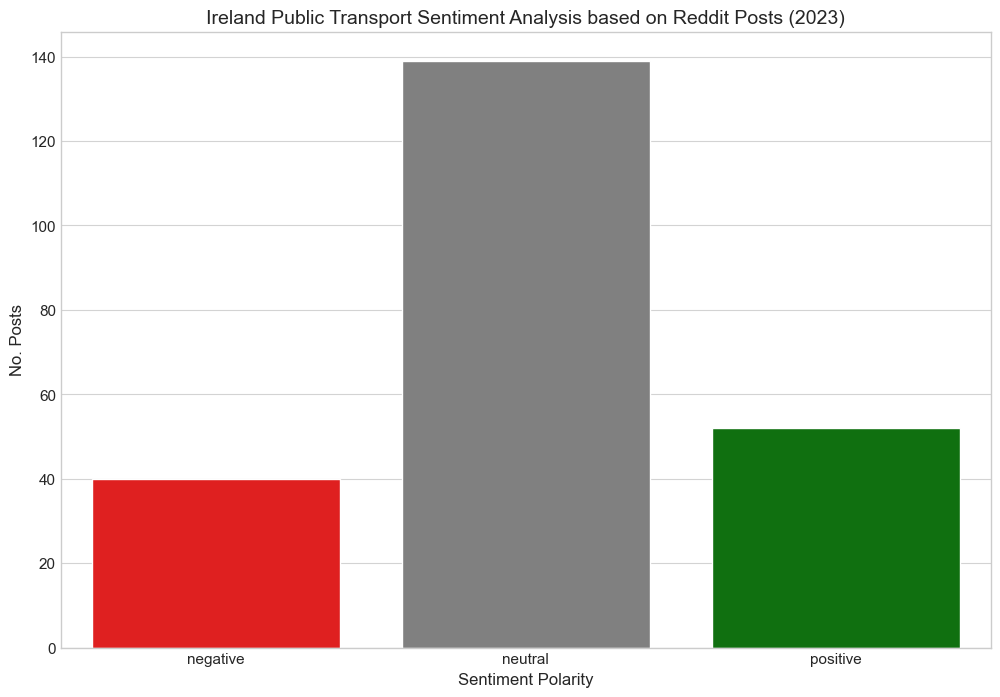

In [240]:
# Define custom colors for each sentiment
colors = {'negative': 'red', 'neutral': 'grey', 'positive': 'green'}

# Plot the monthly average passengers totals using a bar chart
plt.figure(figsize = (12, 8))
sns.barplot(data = polarity_counts, x = polarity_counts.index, y = 'Cleaned Text', palette = colors)
plt.xlabel('Sentiment Polarity', size = 12)
plt.ylabel('No. Posts', size = 12)
plt.title('Ireland Public Transport Sentiment Analysis based on Reddit Posts (2023)', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='-', linewidth = 0.8)
plt.show()

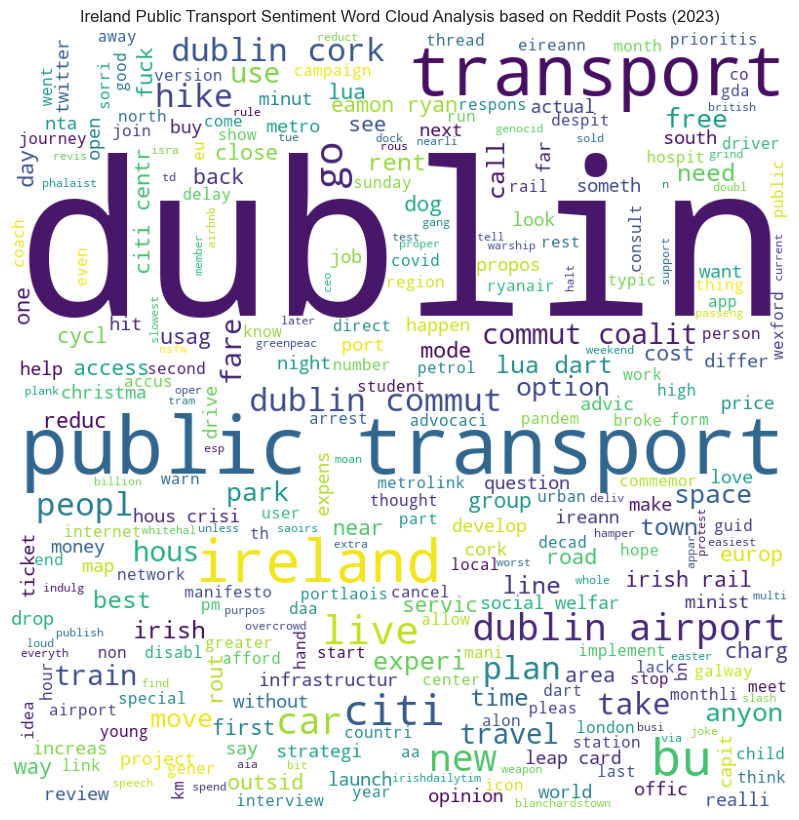

In [264]:
from wordcloud import WordCloud

# Combine all the cleaned text into a single string
text = ' '.join(reddit_sentiment['Cleaned Text'].dropna())

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, max_font_size = 1000,
                     max_words = 300).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Ireland Public Transport Sentiment Word Cloud Analysis based on Reddit Posts (2023)")
plt.tight_layout(pad = 0) 

# Show the plot
plt.show()

# Bag of Words using CountVectorizer

In [244]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv = CountVectorizer(max_features = 3000, stop_words = ['Ireland'])

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

# Define y
y = reddit_sentiment['Polarity']

In [245]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Instantiate an object model by calling a method MultinomialNB()
model = MultinomialNB()

In [246]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.3)

In [247]:
# Train the model by calling a method fit()
model.fit(X_train, y_train)

MultinomialNB()

In [248]:
# Call predict() method
y_pred = model.predict(X_test)

In [249]:
from sklearn.metrics import classification_report

# Instantiate a mthod named as Cla
cf = classification_report(y_test, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

    negative       0.50      0.22      0.31        18
     neutral       0.59      0.85      0.69        39
    positive       0.50      0.23      0.32        13

    accuracy                           0.57        70
   macro avg       0.53      0.43      0.44        70
weighted avg       0.55      0.57      0.52        70



In [250]:
tweet = 'Transport in Ireland is absolutely terrible'
model.predict_proba(cv.transform([tweet]))[0][1]

0.7790921165996765

In [251]:
tweet = "I actually don't mind the public transport in Dublin, I find it ok"
model.predict_proba(cv.transform([tweet]))[0][1]

0.9673957501864534